<a href="https://colab.research.google.com/github/katyk20/distance-education-highered/blob/main/Notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! git clone https://github.com/katyk20/distance-education-highered

Cloning into 'distance-education-highered'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 138 (delta 69), reused 26 (delta 9), pack-reused 0
Receiving objects: 100% (138/138), 3.29 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [ ]:
%cd /content/distance-education-highered
!git pull

/content/distance-education-highered
Already up to date.


In [247]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

In [ ]:
#read in dist_enrollment18_22
enroll1822=pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/dist_enrollment18_22.csv')

In [ ]:
#read in dist_enrollment12_22
enroll1222=pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/dist_enrollment12_22.csv')

In [ ]:
enroll1822.columns

Index(['UNITID', 'INSTNM', 'YEAR', 'IALIAS', 'STABBR', 'OBEREG', 'SECTOR',
       'ICLEVEL', 'CONTROL', 'DEGGRANT', 'LONGITUD', 'LATITUDE', 'EFDELEV',
       'EFDETOT', 'EFDEEXC', 'EFDESOM', 'EFDENON', 'EFDEEX1', 'EFDEEX2',
       'EFDEEX3', 'EFDEEX4', 'EFDEEX5 '],
      dtype='object')

In [ ]:
enroll1222.columns

Index(['UNITID', 'INSTNM', 'YEAR', 'STABBR', 'OBEREG', 'SECTOR', 'ICLEVEL',
       'CONTROL', 'DEGGRANT', 'IALIAS', 'LONGITUD', 'LATITUDE', 'EFDELEV',
       'EFDETOT', 'EFDEEXC', 'EFDESOM', 'EFDENON', 'EFDEEX1', 'EFDEEX2',
       'EFDEEX3', 'EFDEEX4', 'EFDEEX5 '],
      dtype='object')

In [ ]:
def filter_enrollment_data(enroll):
    # Filter by EFDELEV == 1 (summary level for each institution)
    enroll_filtered = enroll[enroll['EFDELEV'] == 1]


    # Select relevant columns
    relevant_data = enroll_filtered[['YEAR', 'INSTNM', 'SECTOR','EFDETOT', 'EFDEEXC', 'EFDESOM', 'EFDENON',
     'EFDEEX1', 'EFDEEX2','EFDEEX3', 'EFDEEX4', 'EFDEEX5 ']]

    #Filter out institutions where EFDENON == EFDETOT
    relevant_data = relevant_data[relevant_data['EFDENON'] != relevant_data['EFDETOT']]

    # Sorting relevant data by year and EFDETOT
    relevant_data_sorted = relevant_data.sort_values(by=['YEAR', 'EFDETOT'], ascending=[True, False])

    # Reset index after sorting
    enroll_processed = relevant_data_sorted.reset_index(drop=True)

    return enroll_processed


In [ ]:
enroll_1822= filter_enrollment_data(enroll1822)
enroll_1822.head()
enroll_1822.describe()



YEAR        SECTOR        EFDETOT        EFDEEXC       EFDESOM  \
count  17413.000000  17413.000000   17413.000000   17413.000000  17413.000000   
mean    2020.065296      2.833573    5424.062195    1520.068512   1373.913341   
std        1.409796      1.759189    9493.683489    5410.883716   2908.031269   
min     2018.000000      1.000000       1.000000       0.000000      0.000000   
25%     2019.000000      2.000000     650.000000      41.000000     86.000000   
50%     2020.000000      2.000000    2127.000000     338.000000    451.000000   
75%     2021.000000      4.000000    6000.000000    1188.000000   1343.000000   
max     2022.000000      9.000000  164091.000000  157898.000000  55201.000000   

            EFDENON       EFDEEX1        EFDEEX2       EFDEEX3       EFDEEX4  \
count  17413.000000  15165.000000   15165.000000  15165.000000  15165.000000   
mean    2530.080342   1145.962677     526.556742     13.535378     37.638642   
std     4842.639388   2692.609452    4505.601975    159.606368    451.315623   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%      170.000000     65.000000       6.000000      0.000000      0.000000   
50%      847.000000    336.000000      30.000000      0.000000      0.000000   
75%     2553.000000   1099.000000     135.000000      0.000000      6.000000   
max    63100.000000  65891.000000  148738.000000  10015.000000  32712.000000   

           EFDEEX5   
count  15165.000000  
mean      21.704121  
std      384.845840  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    19347.000000

In [ ]:
enroll_1222= filter_enrollment_data(enroll1222)
enroll_1222.head()

YEAR                               INSTNM  SECTOR  EFDETOT   EFDEEXC  \
0  2012  University of Phoenix-Online Campus       3   256402  250600.0   
1  2012           Ivy Tech Community College       4   100272   15513.0   
2  2012                   Ashford University       3    77734   76722.0   
3  2012                   Liberty University       2    74372   61786.0   
4  2012             Arizona State University       1    73378    7444.0   

   EFDESOM  EFDENON  EFDEEX1   EFDEEX2  EFDEEX3  EFDEEX4  EFDEEX5   
0   5746.0     56.0  10729.0  236521.0   1771.0   1558.0      21.0  
1  27308.0  57451.0  14677.0     587.0      0.0      0.0     249.0  
2      0.0   1012.0   1058.0   74492.0      0.0   1172.0       0.0  
3   8149.0   4437.0  11282.0   49338.0    373.0    793.0       0.0  
4  28651.0  37283.0   3751.0    3623.0      0.0     70.0       0.0

In [ ]:
#count of unique institutions in dataset
print(enroll_1822['INSTNM'].nunique(), enroll_1222['INSTNM'].nunique())

4318 5524


In [ ]:
#institutions that are totally online DEEXC == DETOT
total_exc = enroll_1822[enroll_1822['EFDEEXC']==enroll_1822['EFDETOT']]

#get list of unique totally DE INSTNM
tot_excinst=total_exc['INSTNM'].unique().tolist()
#uncomment to get number of totally DE INSTM
# len(tot_excinst)  #377 institutions

377

In [183]:
grouped_1822= enroll_1822.drop(columns = ['INSTNM','SECTOR'],axis = 1)
grouped_1822= grouped_1822.groupby('YEAR').sum()
grouped_1822

EFDETOT    EFDEEXC    EFDESOM     EFDENON    EFDEEX1    EFDEEX2  \
YEAR                                                                     
2018  19162012  3295883.0  3720828.0  12145301.0  1881108.0  1315699.0   
2019  19242302  3476721.0  3861100.0  11904481.0  1995224.0  1385350.0   
2020  18948983  8961704.0  5430432.0   4556847.0  6475195.0  1985209.0   
2021  18568902  5745664.0  5642840.0   7180398.0  3875588.0  1649546.0   
2022  18526996  4988981.0  5268753.0   8269262.0  3151409.0  1649429.0   

      EFDEEX3   EFDEEX4  EFDEEX5   
YEAR                               
2018  17589.0   47918.0   33569.0  
2019  12768.0   45861.0   37519.0  
2020  81460.0  233819.0  186021.0  
2021  49344.0  131370.0   39816.0  
2022  44103.0  111822.0   32218.0

#PLOT 2018-2022 EFDEEXC, EFDESOM, and EFDENON enrollment 2018-2022


In [617]:
#function to get aggregated enrollment by year across all institution and plot by type
def plot_aggregated_enrollment_data(enrollment_data):
    # Group by year and sum the enrollment data for each type
    agg_data = enrollment_data.groupby('YEAR')[['EFDEEXC', 'EFDESOM', 'EFDENON']].sum().reset_index()

    #get year range
    year_range = f"{agg_data['YEAR'].min()}-{agg_data['YEAR'].max()}"

    # Plotting
    sns.set_theme()
    sns.set_style("dark")
    fig, ax = plt.subplots()

    # Plot line plot
    ax = sns.lineplot(x='YEAR', y='value', hue='variable',
                      data=pd.melt(agg_data, ['YEAR']))

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Enrollment')
    plt.title('Aggregated Distance Education Enrollment by Type {}'.format (year_range))
    plt.legend()

    # Remove scientific notation, add commas on y-axis
    formatter = StrMethodFormatter('{x:,.0f}')
    plt.gca().yaxis.set_major_formatter(formatter)

    # Set x-axis to integer years
    plt.xticks(agg_data['YEAR'])

    plt.show()

    return agg_data, fig


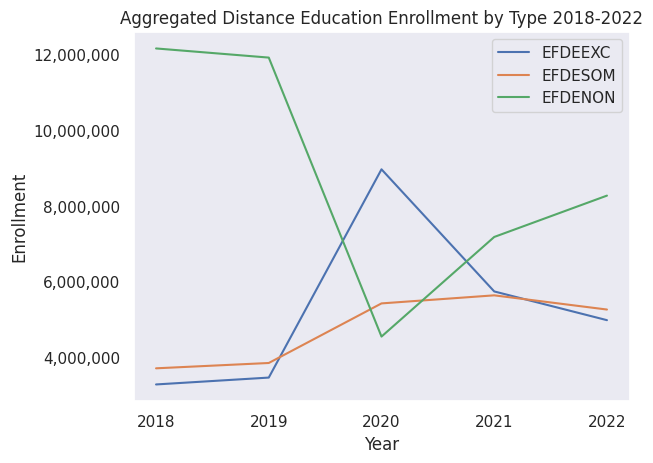

(   YEAR    EFDEEXC    EFDESOM     EFDENON
 0  2018  3295883.0  3720828.0  12145301.0
 1  2019  3476721.0  3861100.0  11904481.0
 2  2020  8961704.0  5430432.0   4556847.0
 3  2021  5745664.0  5642840.0   7180398.0
 4  2022  4988981.0  5268753.0   8269262.0,
 <Figure size 640x480 with 1 Axes>)

In [618]:
plot_aggregated_enrollment_data(enroll_1822)

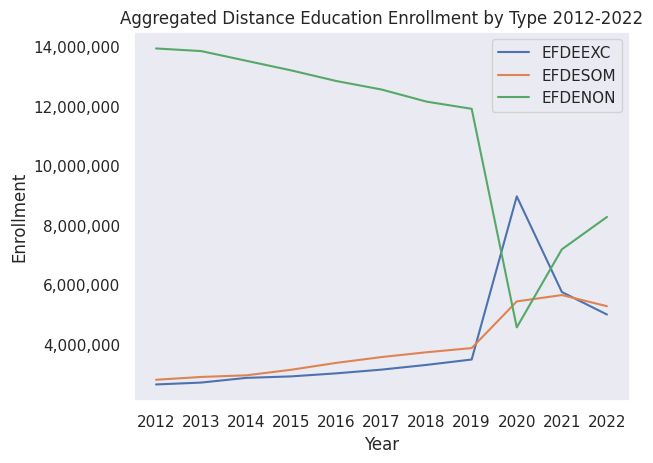

(    YEAR    EFDEEXC    EFDESOM     EFDENON
 0   2012  2638406.0  2795825.0  13933656.0
 1   2013  2701312.0  2890664.0  13845327.0
 2   2014  2859366.0  2945005.0  13519892.0
 3   2015  2909538.0  3133104.0  13195148.0
 4   2016  3012073.0  3364476.0  12838219.0
 5   2017  3136838.0  3558906.0  12553305.0
 6   2018  3295883.0  3720828.0  12145301.0
 7   2019  3476721.0  3861100.0  11904481.0
 8   2020  8961704.0  5430432.0   4556847.0
 9   2021  5745664.0  5642840.0   7180398.0
 10  2022  4988981.0  5268753.0   8269262.0,
 <Figure size 640x480 with 1 Axes>)

In [619]:
plot_aggregated_enrollment_data(enroll_1222)

#What are the top 10 DE institutions by total enrollment in each year?

In [ ]:

def plot_top_10_institutions_enrollment(enroll_processed):
    years = enroll_processed['YEAR'].unique()

    for year in years:
        top_10 = enroll_processed[enroll_processed['YEAR'] == year].head(10)
        top_10 = top_10.sort_values(by='EFDEEXC', ascending=True)


        # plt.figure(figsize=(10, 6))
        fig, axs = plt.subplots(3, 3, figsize=(25, 15))
        ax = axs[i // 3, i % 3]  # Calculate subplot index


        sns.set_style("dark")
        sns.barplot(x='EFDEEXC', y='INSTNM', data=top_10, ax = ax, order=top_10['INSTNM'])
        plt.xlabel('DE Exclusive Enrollment')
        plt.ylabel('Institution Name')
        plt.title(f'Top 10 DE Institutions (All Sectors) by DE Exclusive Enrollment for Year {year}')
        plt.gca().invert_yaxis()  # Invert y-axis to display top institutions at the top
        plt.tight_layout()
        plt.show()


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_10_institutions_enrollment(enroll_processed):
    years = enroll_processed['YEAR'].unique()

    # Calculate the number of rows and columns for the subplots
    num_rows = (len(years) - 1) // 3 + 1
    num_cols = min(len(years), 3)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 15))

    for i, year in enumerate(years):
        top_10 = enroll_processed[enroll_processed['YEAR'] == year].head(10)
        top_10 = top_10.sort_values(by='EFDEEXC', ascending=True)


          # Calculate the subplot index
        if len(years) > 1:
            ax = axs[i // 3, i % 3]  # Select subplot if multiple years
        else:
            ax = axs  # Use the only subplot if there is only one year


        sns.barplot(x='EFDEEXC', y='INSTNM', data=top_10, ax=ax, order=top_10['INSTNM'])
        ax.set_xlabel('DE Exclusive Enrollment')
        ax.set_ylabel('Institution Name')
        ax.set_title(f'Top 10 DE Institutions (All Sectors) by DE Exclusive Enrollment for Year {year}')
        ax.invert_yaxis()  # Invert y-axis to display top institutions at the top

    plt.tight_layout()
    plt.show()


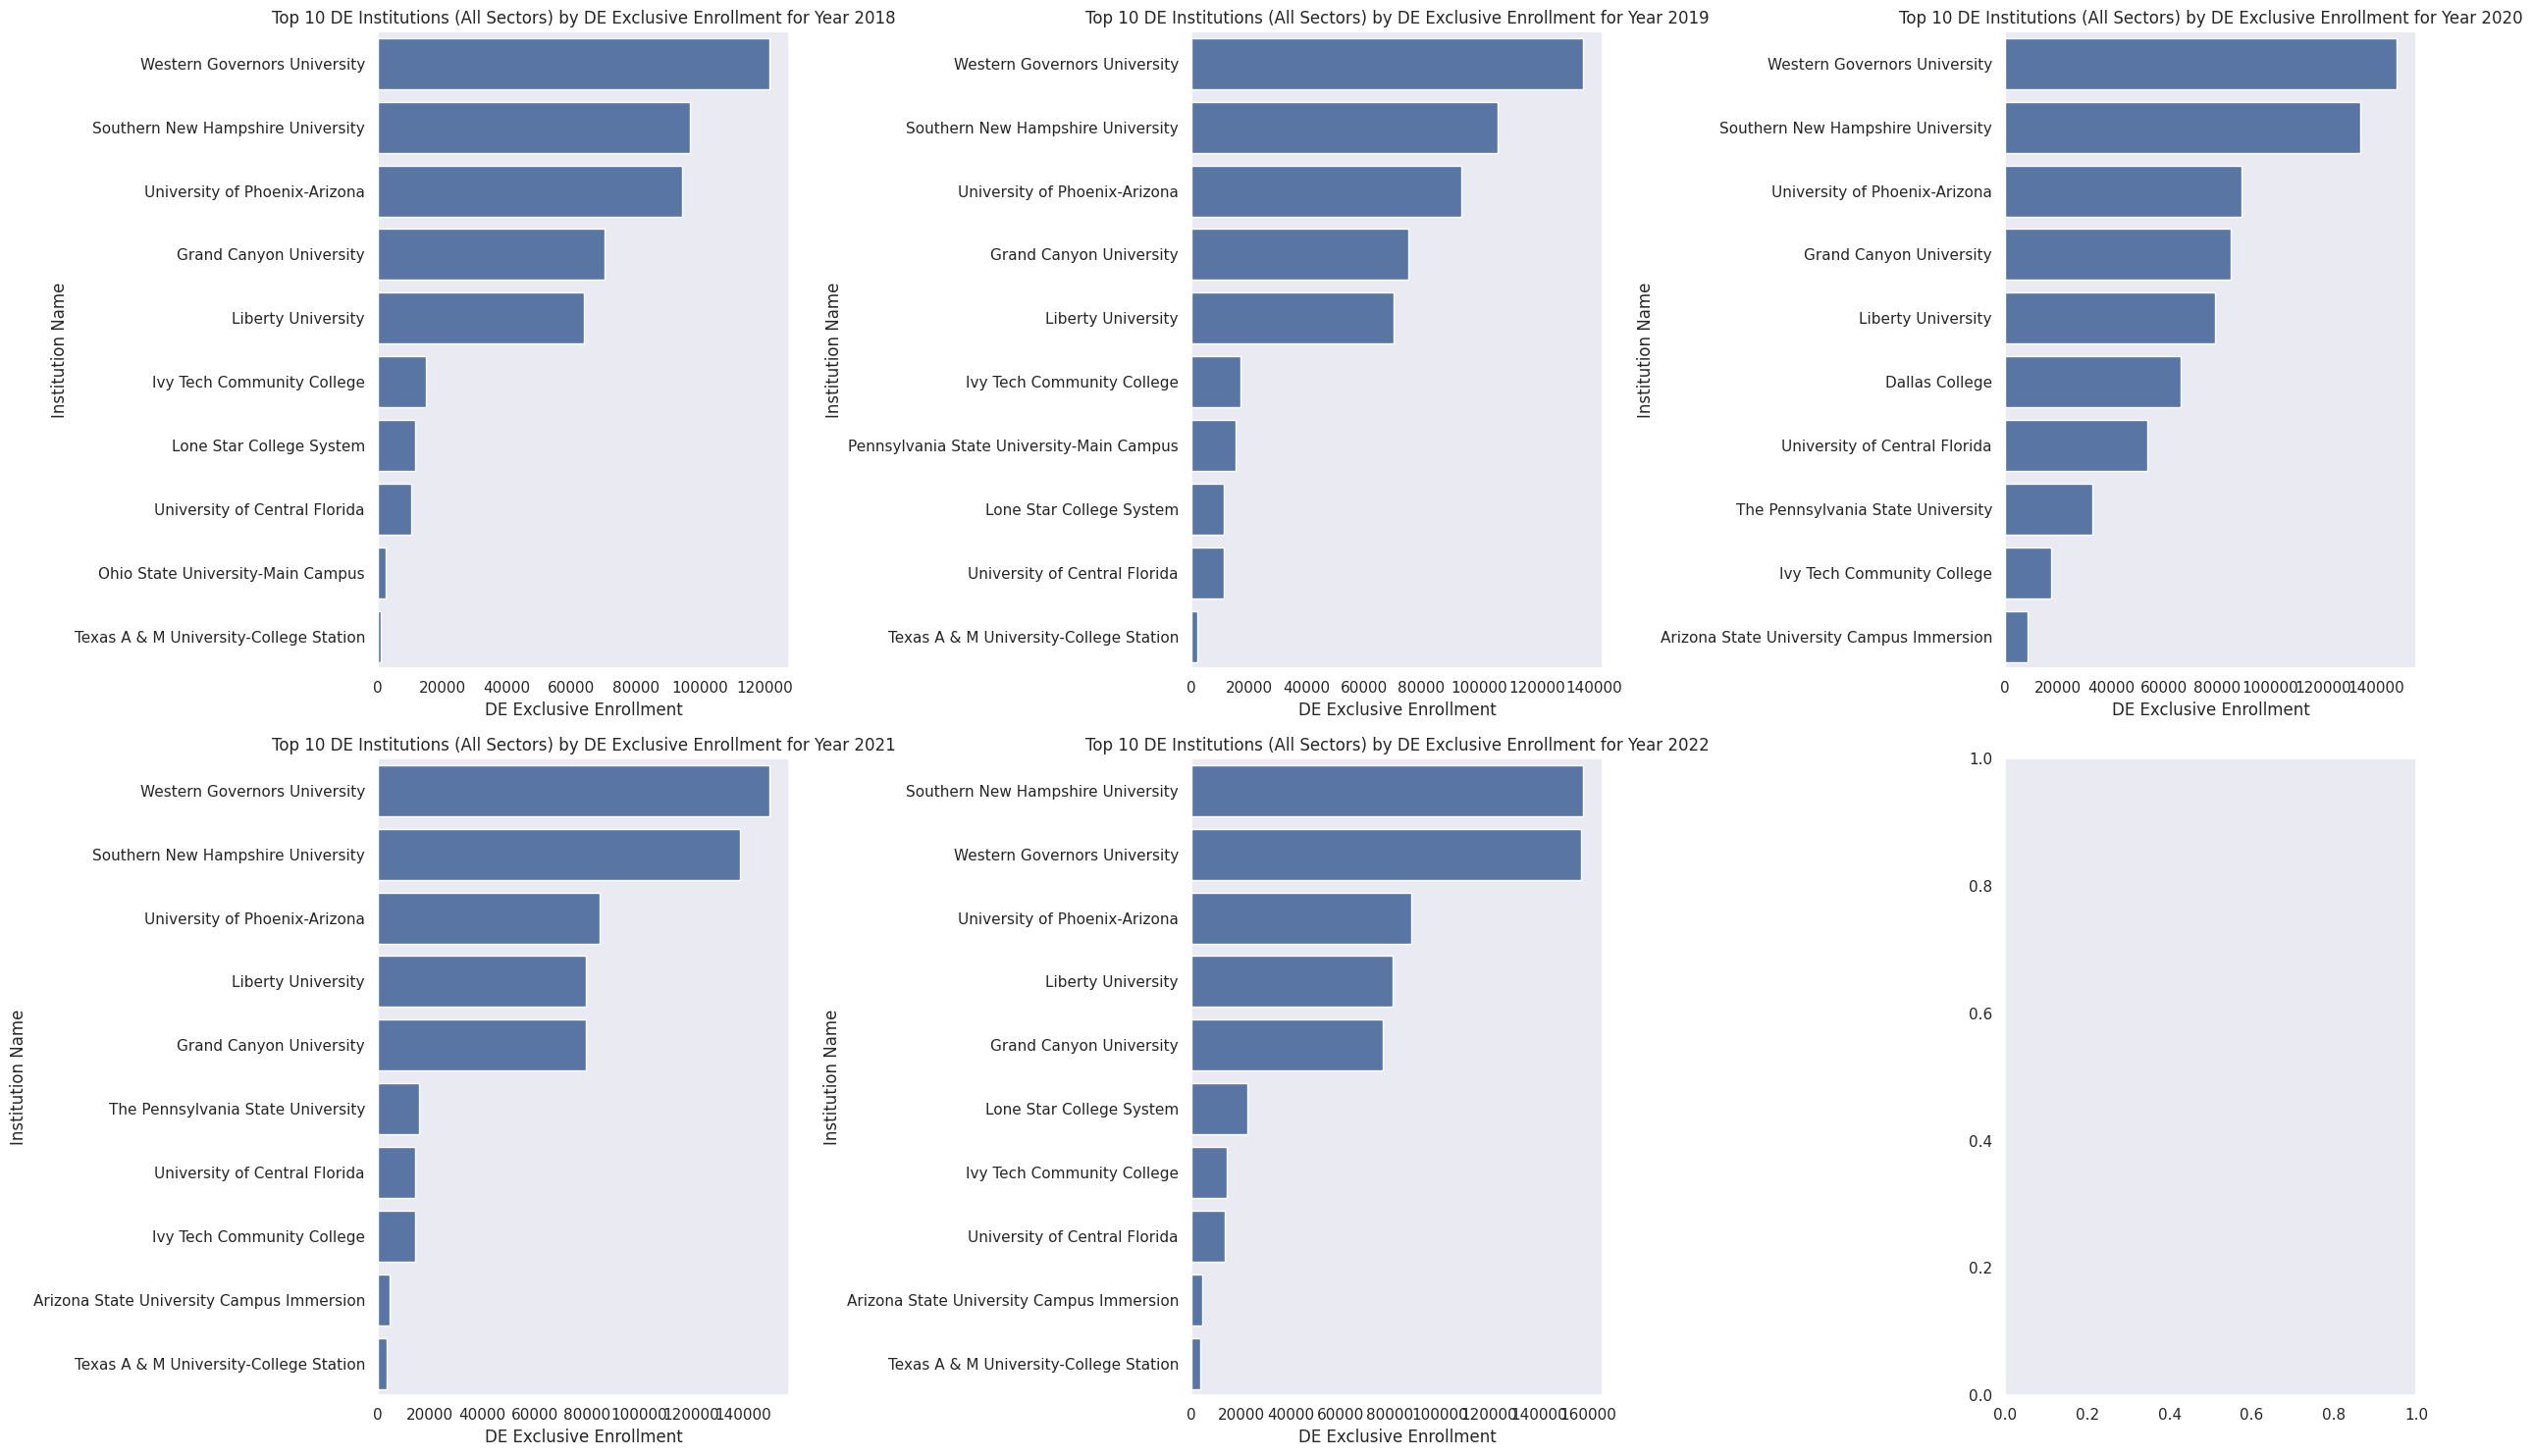

In [248]:
plot_top_10_institutions_enrollment(enroll_1822)

In [ ]:
# plot_top_10_institutions_enrollment(enroll_1222)

In [ ]:
enroll_1822

YEAR                                  INSTNM  SECTOR  EFDETOT  \
0      2018            Western Governors University       2   121437   
1      2018       Southern New Hampshire University       2   104068   
2      2018           University of Phoenix-Arizona       3    95777   
3      2018                 Grand Canyon University       3    90253   
4      2018                      Liberty University       2    79152   
...     ...                                     ...     ...      ...   
17408  2022  Lakewood School of Therapeutic Massage       9        8   
17409  2022  Southwest Acupuncture College-Santa Fe       3        7   
17410  2022                Pathways College-Arizona       2        6   
17411  2022        Health-Tech Institute of Memphis       9        4   
17412  2022            City College-Fort Lauderdale       3        1   

        EFDEEXC  EFDESOM  EFDENON  EFDEEX1   EFDEEX2  EFDEEX3  EFDEEX4  \
0      121437.0      0.0      0.0   8090.0  113124.0      5.0    218.0   
1       96912.0    500.0   6656.0   7152.0   89025.0     46.0    689.0   
2       94472.0    342.0    963.0   4466.0   89454.0    171.0    381.0   
3       70295.0  10704.0   9254.0  12674.0   57278.0      2.0    341.0   
4       64006.0   7106.0   8040.0  12517.0   50337.0    382.0    770.0   
...         ...      ...      ...      ...       ...      ...      ...   
17408       0.0      8.0      0.0      NaN       NaN      NaN      NaN   
17409       0.0      1.0      6.0      NaN       NaN      NaN      NaN   
17410       6.0      0.0      0.0      0.0       6.0      0.0      0.0   
17411       0.0      3.0      1.0      NaN       NaN      NaN      NaN   
17412       1.0      0.0      0.0      1.0       0.0      0.0      0.0   

       EFDEEX5   
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
17408       NaN  
17409       NaN  
17410       0.0  
17411       NaN  
17412       0.0  

[17413 rows x 12 columns]

#What are top 5 institutions by DE exclusive enrollment for each sector in 2022?

In [96]:
def plot_top_5_sector(enroll_processed, year):
    year = year
    data= enroll_processed[enroll_processed['YEAR']==year]
    data = data[data['EFDEEXC'] != 0]
    sector = [1,2,3,4,5,6,7,8,9]

    sector_names = {
        1: 'Public, 4-year',
        2: 'Private not-for-profit, 4-year',
        3: 'Private for-profit, 4-year',
        4: 'Public, 2-year',
        5: 'Private not-for-profit, 2-year',
        6: 'Private for-profit, 2-year',
        7: 'Public, less-than 2-year',
        8: 'Private not-for-profit, less-than 2-year',
        9: 'Private for-profit, less-than 2-year',
        99: 'Sector unknown'
    }

    # Define a color palette for each sector
    sector_colors = {
        1: 'blue',
        2: 'green',
        3: 'orange',
        4: 'red',
        5: 'purple',
        6: 'brown',
        7: 'pink',
        8: 'gray',
        9: 'cyan',
        99: 'black'
    }

    fig, axs = plt.subplots(3, 3, figsize=(25, 15))

    for i, sec in enumerate(sector):
        ax = axs[i // 3, i % 3]  # Calculate subplot index
        top_5sec = data[data['SECTOR'] == sec].head(5)
        top_5sec = top_5sec.sort_values(by='EFDEEXC', ascending=True)  # Sort by DE Exclusive Enrollment

        sns.barplot(x='EFDEEXC', y='INSTNM', data=top_5sec, ax=ax, order=top_5sec['INSTNM'],  palette=[sector_colors[sec]])
        ax.set_xlabel('DE Exclusive Enrollment')
        ax.set_ylabel('Institution Name')
        ax.set_title(f'Top 5 DE Institutions\n{sector_names[sec]}', fontsize=10)
        ax.invert_yaxis()  # Invert y-axis to display top institutions at the top

    plt.tight_layout()
    plt.show()


<ipython-input-96-c238a07b89c8>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EFDEEXC', y='INSTNM', data=top_5sec, ax=ax, order=top_5sec['INSTNM'],  palette=[sector_colors[sec]])
<ipython-input-96-c238a07b89c8>:41: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='EFDEEXC', y='INSTNM', data=top_5sec, ax=ax, order=top_5sec['INSTNM'],  palette=[sector_colors[sec]])
<ipython-input-96-c238a07b89c8>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EFDEEXC', y='INSTNM', data=top_5sec, ax=ax, order=top_5sec['INSTNM'],  palette=[sector_colors[sec]])
<ipython-input-96-c238a07b89c8>:41: UserWarni

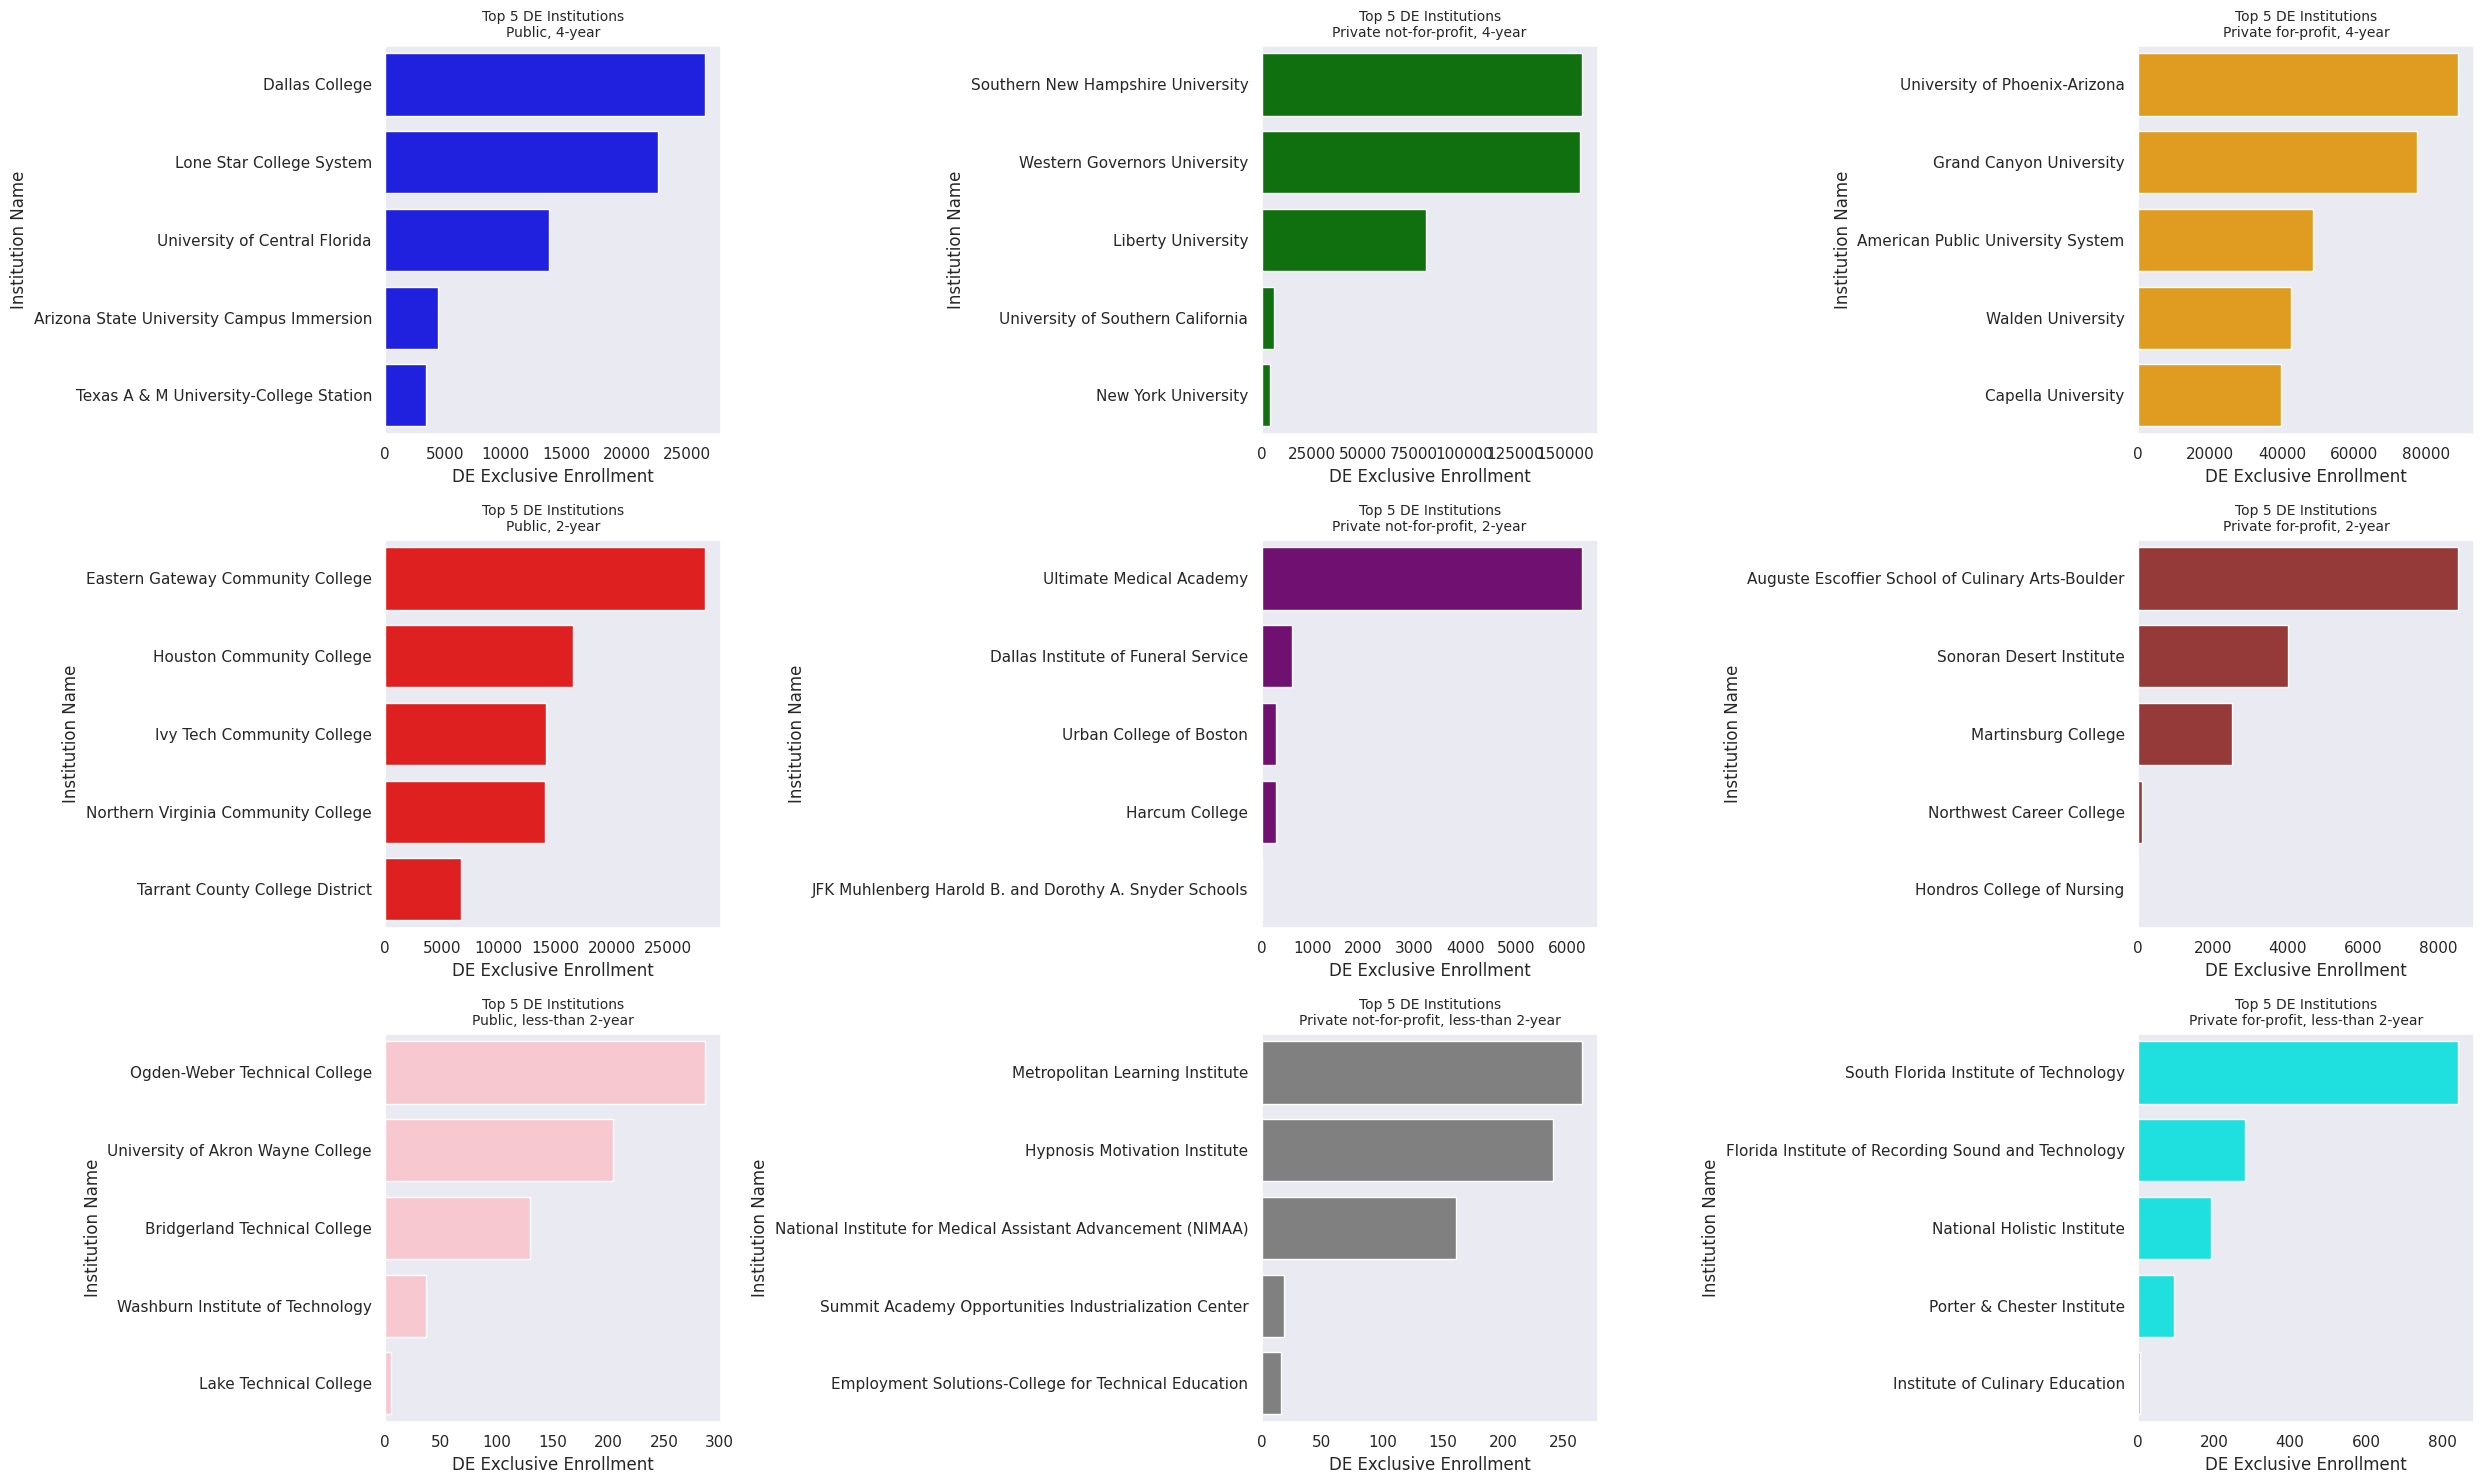

In [97]:
plot_top_5_sector(enroll_1822, 2022)

#What is percentage of all students enrolled in DE courses, by sector, in a particular year?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sector_enrollment(data, year):
    data_year= data.copy()
    # Filter data for the specified year
    data_year = data[data['YEAR'] == year]

    # Calculate percentages
    data_year.loc[:, '% EFDEEXC'] = data_year['EFDEEXC'] / data_year['EFDETOT']
    data_year.loc[:, '% EFDESOM'] = data_year['EFDESOM'] / data_year['EFDETOT']

    # Map sector labels
    legend_key = {
        1: 'Public, 4-year',
        2: 'Private not-for-profit, 4-year',
        3: 'Private for-profit, 4-year',
        4: 'Public, 2-year',
        5: 'Private not-for-profit, 2-year',
        6: 'Private for-profit, 2-year',
        7: 'Public, less-than 2-year',
        8: 'Private not-for-profit, less-than 2-year',
        9: 'Private for-profit, less-than 2-year',
        99: 'Sector unknown'
    }
    data_year['SECTOR_LABEL'] = data_year['SECTOR'].map(legend_key)

    # Melt the DataFrame for plotting
    data_melted = data_year.melt(id_vars=['SECTOR_LABEL'], value_vars=['% EFDEEXC', '% EFDESOM'])

    # Create bar plot
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(data=data_melted, x='SECTOR_LABEL', y='value', hue='variable', errorbar=None)

    # Add percentages above the bars
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height() * 100),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')


    plt.xlabel('Sector')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('')  # Remove y-axis label
    plt.yticks([])  # Remove y-axis ticks
    plt.title('Percentage of Students Enrolled Exclusively in DE by Sector for the Year {}'.format(year))

    plt.legend(title=None, labels=['Enrolled exclusively in DE courses',
                                       ' Enrolled in some but not all DE courses'],
               loc='upper left')
    plt.tight_layout()
    plt.show()




<ipython-input-17-2c736f150588>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.loc[:, '% EFDEEXC'] = data_year['EFDEEXC'] / data_year['EFDETOT']
<ipython-input-17-2c736f150588>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.loc[:, '% EFDESOM'] = data_year['EFDESOM'] / data_year['EFDETOT']
<ipython-input-17-2c736f150588>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

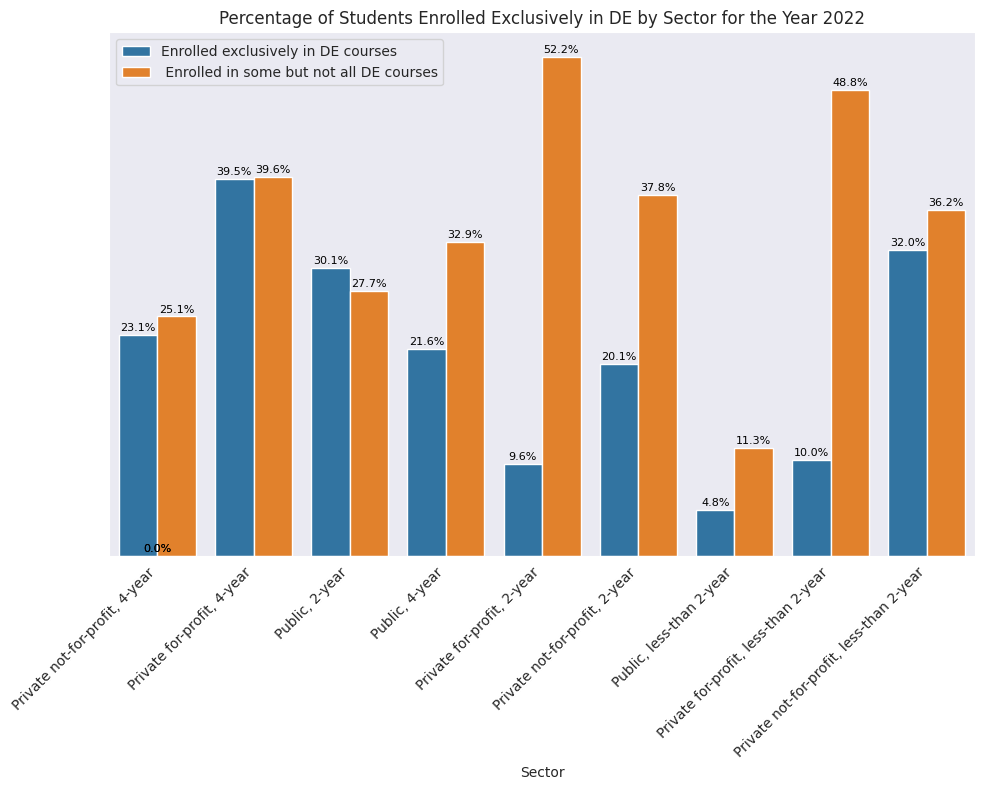

In [ ]:

plot_sector_enrollment(enroll_1822, 2022)

#What is the percentage of percentage of all students enrolled in DE courses, 2019 and 2022?

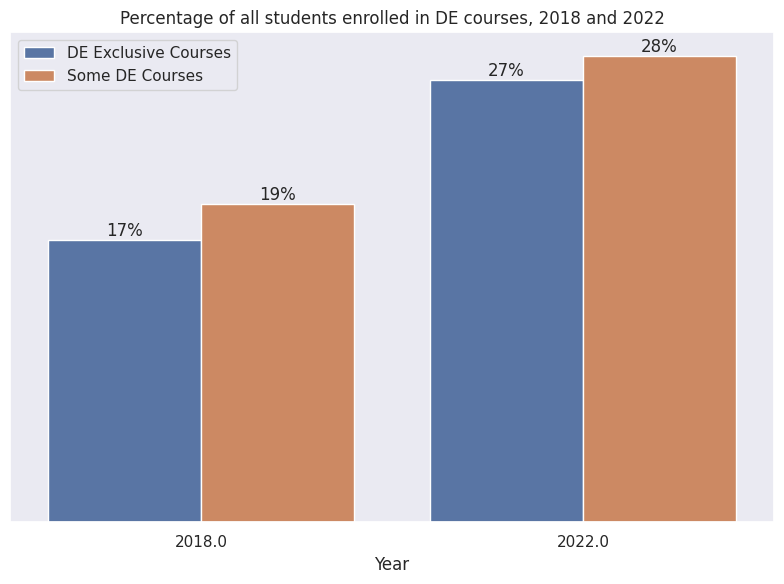

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_enrollment_percentage(years, enroll_df):
    df = pd.DataFrame()
    for year in years:
        data_year_filtered = enroll_df.copy()
        data_year_filtered = data_year_filtered[data_year_filtered['YEAR'] == year]

        # Calculate total percentage of students enrolled exclusively in EFDEEXC for the current year
        total_percentage_efdeexc = (data_year_filtered['EFDEEXC'].sum() / data_year_filtered['EFDETOT'].sum()) * 100

        # Calculate total percentage of students enrolled exclusively in EFDESOM for the current year
        total_percentage_efdesom = (data_year_filtered['EFDESOM'].sum() / data_year_filtered['EFDETOT'].sum()) * 100

        # Add the calculated percentages to the DataFrame
        df.loc[year, 'YEAR'] = year
        df.loc[year, 'DE Exclusive Courses'] = total_percentage_efdeexc
        df.loc[year, 'Some DE Courses'] = total_percentage_efdesom

    # Melt the DataFrame to long format for Seaborn plotting
    df_melted = df.melt(id_vars='YEAR', var_name='Variable', value_name='Total Percentage')

    # Plot using Seaborn
    sns.set(style='dark')
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=df_melted, x='YEAR', y='Total Percentage', hue='Variable')

    # Add percentages above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%')

    # Add legend and labels
    plt.xlabel('Year')
    plt.title('Percentage of all students enrolled in DE courses, 2018 and 2022')
    plt.ylabel('')  # Remove y-axis label
    plt.yticks([])  # Remove y-axis ticks
    plt.legend(title=None)
    plt.tight_layout()
    plt.show()

# Sample usage:
years = [2018, 2022]
plot_enrollment_percentage(years, enroll_1822)


#What are top 10 institutions grand enrollment by Sector (eg. 4+ year, 2-4, less than 2 years)by year?

#What are the home locations of DE students across years?

In [ ]:

stu_located = enroll_1822[['YEAR', 'EFDEEXC','EFDEEX1', 'EFDEEX2','EFDEEX3', 'EFDEEX4']].dropna()
stu_located = stu_located[stu_located['EFDEEXC'] != 0]

# # Grouping by year and summing the 'EXE1', 'EXE2', 'EXE4' values
grouped_data = stu_located.groupby('YEAR').sum().reset_index()
grouped_data['% EX1']=grouped_data['EFDEEX1']/grouped_data['EFDEEXC'] *100
grouped_data['% EX2']=grouped_data['EFDEEX2']/grouped_data['EFDEEXC'] *100
grouped_data['% EX3']=grouped_data['EFDEEX3']/grouped_data['EFDEEXC'] *100
grouped_data['% EX4']=grouped_data['EFDEEX4']/grouped_data['EFDEEXC'] *100
grouped_data


YEAR    EFDEEXC    EFDEEX1    EFDEEX2  EFDEEX3   EFDEEX4      % EX1  \
0  2018  3295883.0  1881108.0  1315699.0  17589.0   47918.0  57.074477   
1  2019  3476721.0  1995224.0  1385350.0  12768.0   45861.0  57.388096   
2  2020  8961704.0  6475195.0  1985209.0  81460.0  233819.0  72.254060   
3  2021  5745664.0  3875588.0  1649546.0  49344.0  131370.0  67.452395   
4  2022  4988981.0  3151409.0  1649429.0  44103.0  111822.0  63.167388   

       % EX2     % EX3     % EX4  
0  39.919469  0.533666  1.453874  
1  39.846453  0.367243  1.319088  
2  22.152138  0.908979  2.609091  
3  28.709406  0.858804  2.286420  
4  33.061441  0.884008  2.241380

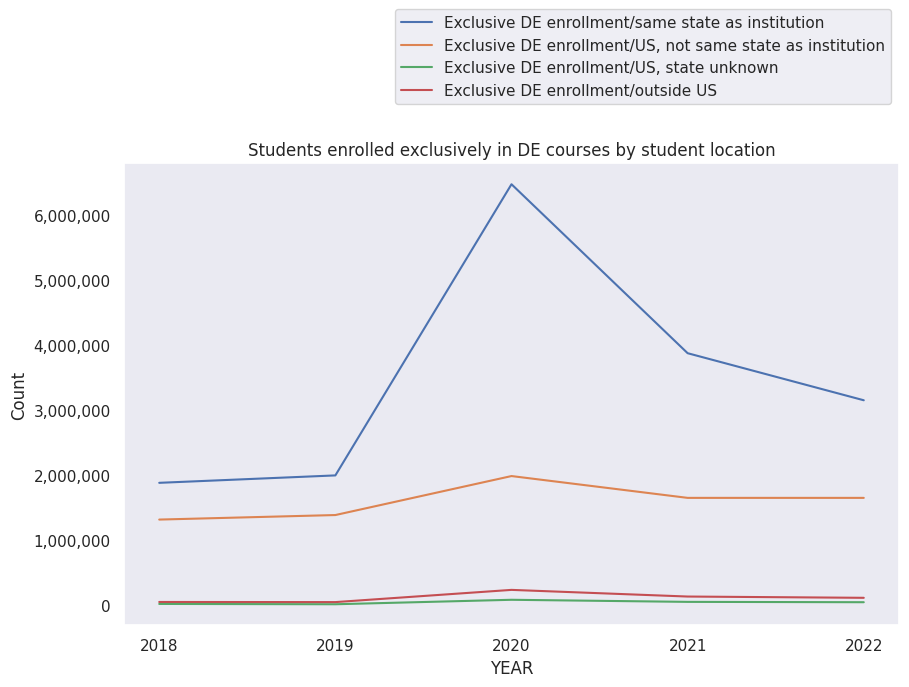

In [ ]:

# Plotting the totals of EXE1, EXE2, and EXE4 for each year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX1'], label='Exclusive DE enrollment/same state as institution')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX2'], label='Exclusive DE enrollment/US, not same state as institution')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX3'], label='Exclusive DE enrollment/US, state unknown')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX4'], label='Exclusive DE enrollment/outside US')


plt.xlabel('YEAR')
plt.ylabel('Count')

   # Remove scientific notation, add commas on y-axis
formatter = StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Students enrolled exclusively in DE courses by student location')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.35))
plt.grid(False)
plt.xticks([2018, 2019, 2020, 2021,2022])
plt.show()

#What are the home locations of DE students across sectors 2018 compared to 2022?

In [ ]:
enroll_1822.isnull().sum()

YEAR           0
INSTNM         0
SECTOR         0
EFDETOT        0
EFDEEXC        0
EFDESOM        0
EFDENON        0
EFDEEX1     2248
EFDEEX2     2248
EFDEEX3     2248
EFDEEX4     2248
EFDEEX5     2248
dtype: int64

In [ ]:
stu_located2 = enroll_1822[(enroll_1822['YEAR'] == 2018) | (enroll_1822['YEAR'] == 2022)].copy()
stu_located2 = stu_located2[['YEAR', 'SECTOR','EFDEEXC','EFDEEX1', 'EFDEEX2','EFDEEX3', 'EFDEEX4']]


stu_located2 = stu_located2[stu_located2['EFDEEXC'] != 0]


# Grouping by year and summing the 'EXE1', 'EXE2', 'EXE4' values
result = stu_located2.groupby(['YEAR','SECTOR']).sum().reset_index()
result['% EX1']=result['EFDEEX1']/result['EFDEEXC'] *100
result['% EX2']=result['EFDEEX2']/result['EFDEEXC'] *100
result['% EX3']=result['EFDEEX3']/result['EFDEEXC'] *100
result['% EX4']=result['EFDEEX4']/result['EFDEEXC'] *100

result


# # Unstack the 'sector' index to make it columns
# unstacked_data = result.set_index(['YEAR', 'SECTOR']).unstack('SECTOR')
# unstacked_data

YEAR  SECTOR    EFDEEXC    EFDEEX1   EFDEEX2  EFDEEX3  EFDEEX4  \
0   2018       1  1034529.0   756263.0  242941.0   8529.0  15372.0   
1   2018       2   839075.0   290474.0  522827.0   3735.0  17951.0   
2   2018       3   614183.0   106715.0  494852.0   1592.0  10772.0   
3   2018       4   776192.0   721679.0   29415.0   3733.0   3704.0   
4   2018       5    20206.0     2954.0   17246.0      0.0      5.0   
5   2018       6    10804.0     2563.0    7988.0      0.0    112.0   
6   2018       7      186.0      186.0       0.0      0.0      0.0   
7   2018       8       27.0       27.0       0.0      0.0      0.0   
8   2018       9      681.0      247.0     430.0      0.0      2.0   
9   2022       1  1769358.0  1330413.0  363141.0  20918.0  30571.0   
10  2022       2  1127311.0   365150.0  686141.0   5669.0  64227.0   
11  2022       3   625577.0   102719.0  510765.0   2165.0   9653.0   
12  2022       4  1424862.0  1339999.0   60770.0  15344.0   7254.0   
13  2022       5    10091.0     2586.0    7498.0      4.0      2.0   
14  2022       6    25935.0     5812.0   20005.0      3.0    107.0   
15  2022       7      793.0      774.0      19.0      0.0      0.0   
16  2022       8      708.0      463.0     242.0      0.0      3.0   
17  2022       9     4346.0     3493.0     848.0      0.0      5.0   

         % EX1      % EX2     % EX3     % EX4  
0    73.102156  23.483247  0.824433  1.485894  
1    34.618360  62.309925  0.445133  2.139380  
2    17.375115  80.570775  0.259206  1.753875  
3    92.976867   3.789655  0.480938  0.477202  
4    14.619420  85.350886  0.000000  0.024745  
5    23.722695  73.935579  0.000000  1.036653  
6   100.000000   0.000000  0.000000  0.000000  
7   100.000000   0.000000  0.000000  0.000000  
8    36.270191  63.142438  0.000000  0.293686  
9    75.191849  20.523885  1.182237  1.727802  
10   32.391239  60.865280  0.502878  5.697363  
11   16.419881  81.647023  0.346080  1.543055  
12   94.044125   4.264974  1.076876  0.509102  
13   25.626796  74.303835  0.039639  0.019820  
14   22.409871  77.135146  0.011567  0.412570  
15   97.604035   2.395965  0.000000  0.000000  
16   65.395480  34.180791  0.000000  0.423729  
17   80.372757  19.512195  0.000000  0.115048

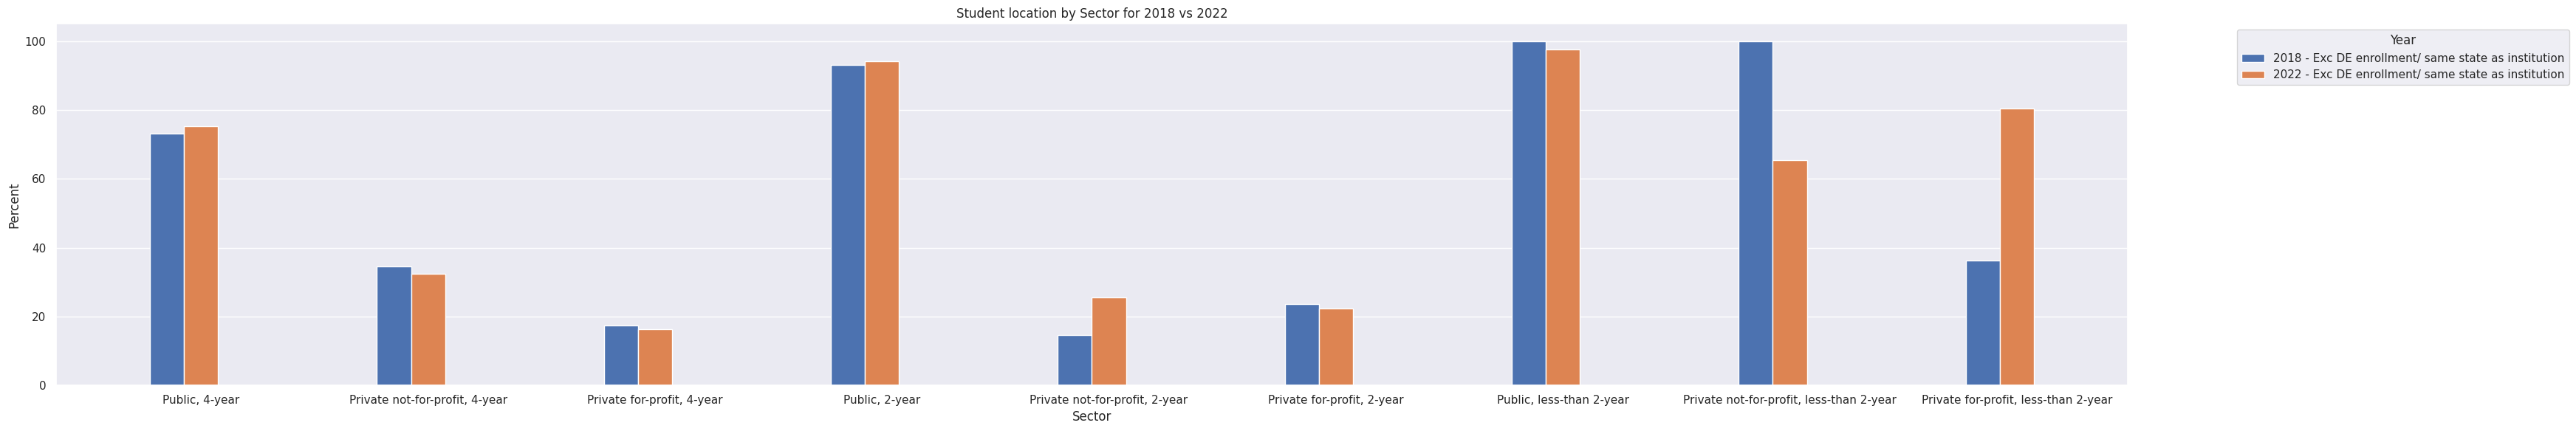

In [ ]:
def plot_sector_comparison(result, sectors, years, cols):
    sector_names = {
        1: 'Public, 4-year',
        2: 'Private not-for-profit, 4-year',
        3: 'Private for-profit, 4-year',
        4: 'Public, 2-year',
        5: 'Private not-for-profit, 2-year',
        6: 'Private for-profit, 2-year',
        7: 'Public, less-than 2-year',
        8: 'Private not-for-profit, less-than 2-year',
        9: 'Private for-profit, less-than 2-year',
        99: 'Sector unknown'
    }

    num_sectors = len(sectors)
    num_years = len(years)
    bar_width = 0.15  # Adjust the bar width as needed
    index = np.arange(num_sectors)
    offset = bar_width / 2 * (num_years - 1)

    plt.figure(figsize=(35, 6))

    for i, year in enumerate(years):
        for j, col in enumerate(cols):
            # Filter data for the year
            year_data = result[result['YEAR'] == year]

            # Define colors for each plot
            colors = ['b', 'orange']

            # Filter data for the given sectors
            year_data = year_data[year_data['SECTOR'].isin(sectors)]

            # Define colors for each year
            colors = ['b', 'orange']

            # Plotting
            plt.bar(index + (i * len(cols) + j) * bar_width - offset, year_data[col], bar_width, label=f'{year}-{col}')

    plt.xlabel('Sector', )
    plt.ylabel('Percent')
    plt.title('Student location by Sector for 2018 vs 2022')
    plt.xticks(index + ((num_years * len(cols) - 1) / 2) * bar_width, [sector_names[sector] for sector in sectors], rotation=0, ha='center')



    # Customize legend handles
    col_labels = {
        '% EX1': 'Exc DE enrollment/ same state as institution',
        '% EX2': 'Excl DE enrollment/ US, not same state as institution',
        '% EX4': 'Excl DE enrollment/ outside US',
    }


    legend_labels = [f'{year} - {col_labels[col]}' for year in years for col in cols]
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles, legend_labels, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')

    # Show plot
    plt.tight_layout()
    plt.show()


colors = ['b', 'orange']
cols = ['% EX1']  # Columns to compare
sectors_to_plot = [1, 2, 3, 4,5,6,7,8,9]  # Sectors to plot
years_to_plot = [2018, 2022]  # Years to compare
plot_sector_comparison(result, sectors_to_plot, years_to_plot, cols)



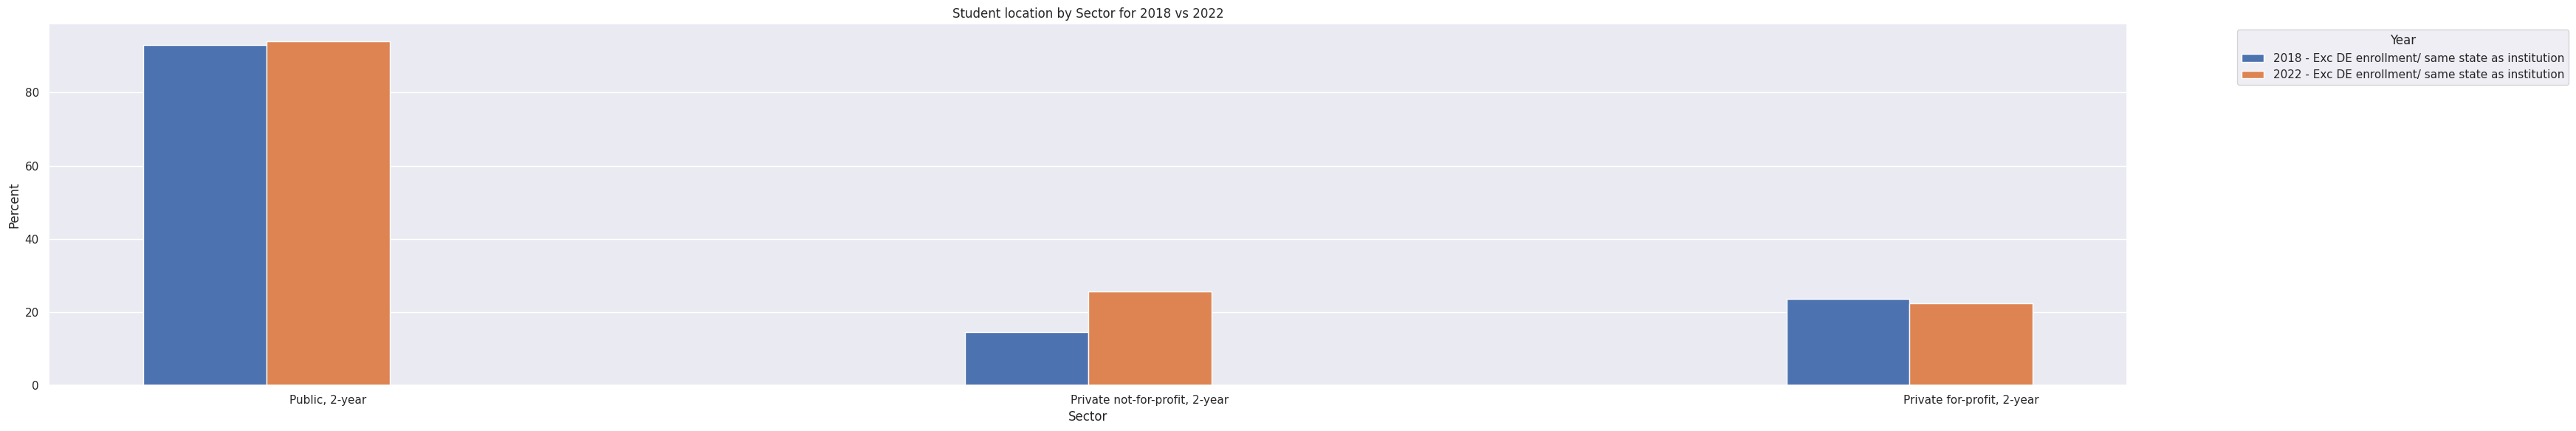

In [ ]:


cols = ['% EX1']  # Columns to compare
sectors_to_plot = [4, 5, 6]  # Sectors to plot
years_to_plot = [2018, 2022]  # Years to compare
plot_sector_comparison(result, sectors_to_plot, years_to_plot, cols)

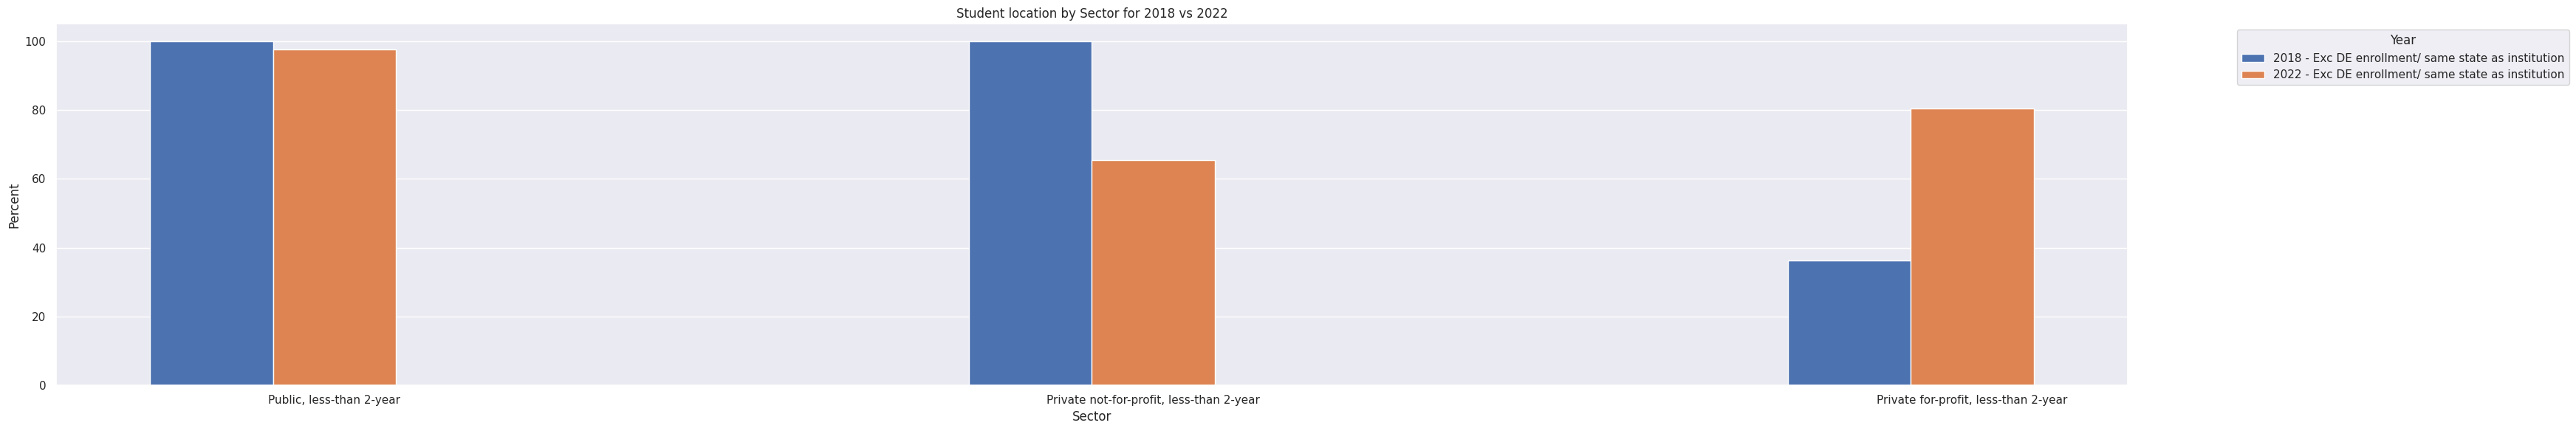

In [ ]:

cols = ['% EX1']  # Columns to compare
sectors_to_plot = [7, 8, 9]  # Sectors to plot
years_to_plot = [2018, 2022]  # Years to compare
plot_sector_comparison(result, sectors_to_plot, years_to_plot, cols)


#What are characteristics across students (eg. race, gender, level)?

In [128]:
age_dat= pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/age_gen_by_inst_18_22.csv')
#find only DE online universities in tot_excinst list

age= age_dat[age_dat['INSTNM'].isin(tot_excinst)]
cols_keep= [ 'YEAR',
        'EFBAGE',  'EFAGE01', 'EFAGE02', 'EFAGE03', 'EFAGE04']
age = age[cols_keep]
agegroups=[2,7]
age=age[age['EFBAGE'].isin(agegroups)]
age = age.rename (columns = {'EFAGE01':'FT M',
'EFAGE02':'FT W', 'EFAGE03':'PT M',
'EFAGE04':'PT W'})

age.head()

YEAR  EFBAGE  FT M  FT W  PT M  PT W
1219  2018       2    25     5    43    17
1220  2018       2    22     2    42    15
1221  2018       2     3     3     1     2
1229  2018       7   122    22   217    95
1230  2018       7    56     6   123    39

In [163]:

age_grouped = age.groupby(['YEAR','EFBAGE']).sum()
age_grouped.reset_index(inplace=True)

Index(['YEAR', 'EFBAGE', 'FT M', 'FT W', 'PT M', 'PT W'], dtype='object')

In [258]:

def plot_demog_grouped(df, cats, cat_titles):
    # Create subplots
    fig, ax = plt.subplots(1, len(cats), figsize=(16, 6), sharey=True)

    for i, cat in enumerate(cats):
        # Filter data for the sector
        df_cat = df[df['EFBAGE'] == cat].copy()
        years = df_cat['YEAR']

        # Plot each column for the sector
        for column in ['FT M', 'FT W', 'PT M', 'PT W']:
            ax[i].plot(years, df_cat[column], label=f'{column}', linestyle='-')

        # Set labels and title
        ax[i].set_title(cat_titles.get(cat, f' {cat}'))
        ax[i].legend()
        ax[i].grid(False)

        # Set x-axis to display only whole years
        ax[i].xaxis.set_major_locator(ticker.MultipleLocator(base=1))

        # Format y-axis ticks to have commas
        ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    # Set common y-axis label
    ax[0].set_ylabel('Count')

    # Move legend above plots
    for axis in ax:
        axis.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4)

    plt.tight_layout()
    plt.show()




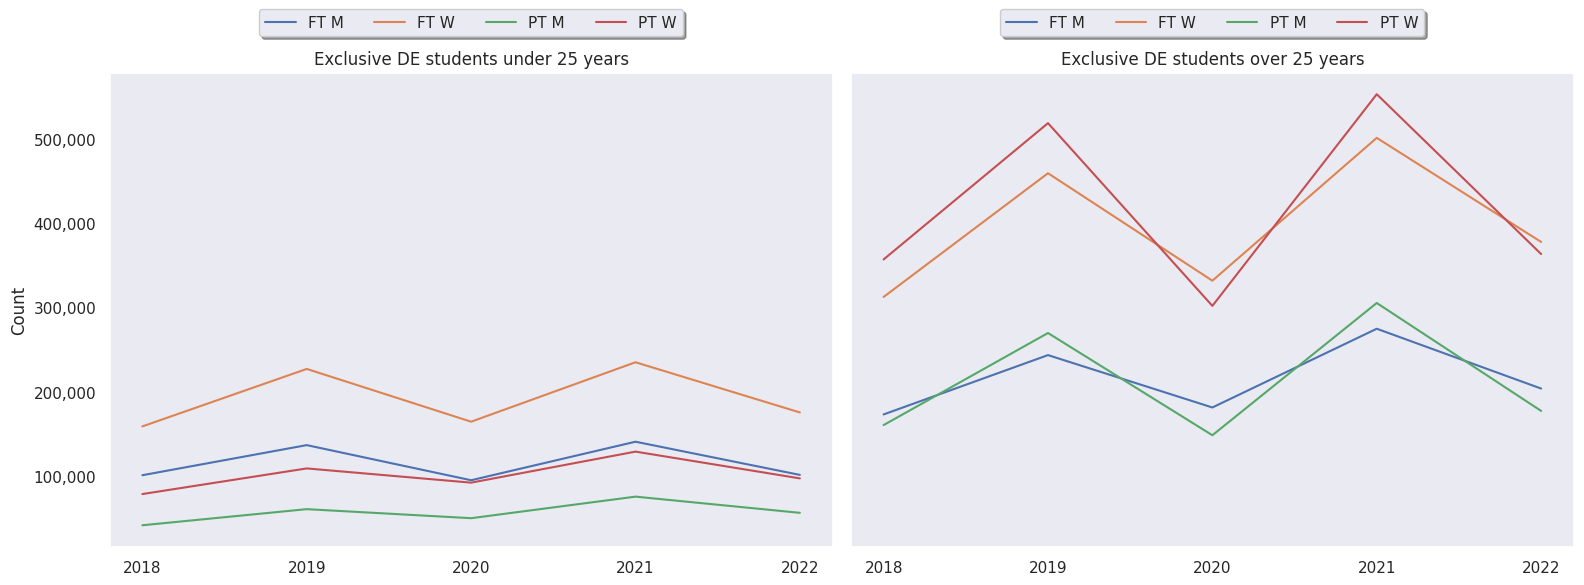

In [259]:

cat_titles = {2: 'Exclusive DE students under 25 years', 7: 'Exclusive DE students over 25 years'}
plot_demog_grouped(age_grouped, [2, 7], cat_titles)

In [261]:
race_dat = pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/race_gen_by_inst_18_22.csv')

In [380]:
#find only DE online universities in tot_excinst list

race= race_dat[race_dat['INSTNM'].isin(tot_excinst)]

race_to_keep=['YEAR', 'EFTOTLT', 'EFTOTLM', 'EFTOTLW', 'EFAIANT',
       'EFAIANM', 'EFAIANW', 'EFASIAT', 'EFASIAM', 'EFASIAW', 'EFBKAAT',
       'EFBKAAM', 'EFBKAAW', 'EFHISPT', 'EFHISPM', 'EFHISPW',  'EFWHITT', 'EFWHITM', 'EFWHITW', 'EF2MORT',
       'EF2MORM', 'EF2MORW',  ]

race2= race[race_to_keep]


# race2

In [383]:
#Line variable 25=Total part time, 14=total full time, 29=Total enrollment
#EFLEVEL 1= Total, 2= all students, undergrad, 12= all students, grad, 21= Full time total, 22 = Full time undergrad, 32, fulltime Grad, 41 parttime total, 42, parttime undergrad, 52 partime grad
level_to_keep=['YEAR', 'EFALEVEL', 'EFTOTLT', 'EFTOTLM', 'EFTOTLW', ]
level =race[level_to_keep]
level.head()

YEAR  EFALEVEL  EFTOTLT  EFTOTLM  EFTOTLW
54  2018         1      755      273      482
55  2018         2      351      112      239
56  2018         3      351      112      239
57  2018         4        1        0        1
58  2018         5      350      112      238

In [341]:
race_df=race2.groupby('YEAR').sum()
race_df.head()


EFTOTLT  EFTOTLM  EFTOTLW  EFAIANT  EFAIANM  EFAIANW  EFASIAT  EFASIAM  \
YEAR                                                                           
2018  7876276  2886076  4990200    88094    31290    56804   282476   114378   
2019  8082838  2915150  5167688    90042    31310    58732   286306   115044   
2020  9064644  3295834  5768810    99096    31682    67414   333128   134698   
2021  8773738  3240738  5533000   105854    34110    71744   344596   140252   
2022  9055662  3368042  5687620   104776    33370    71406   363432   148632   

      EFASIAW  EFBKAAT  ...  EFBKAAW  EFHISPT  EFHISPM  EFHISPW  EFWHITT  \
YEAR                    ...                                                
2018   168098  1594726  ...  1132254  1096578   418380   678198  3738982   
2019   171262  1631108  ...  1172302  1211984   456426   755558  3729206   
2020   198430  1700392  ...  1215510  1405108   517590   887518  4096714   
2021   204344  1556390  ...  1088706  1382638   505640   876998  3922458   
2022   214800  1607452  ...  1117414  1493000   553042   939958  4042690   

      EFWHITM  EFWHITW  EF2MORT  EF2MORM  EF2MORW  
YEAR                                               
2018  1427108  2311874   245136    90840   154296  
2019  1400080  2329126   260706    95656   165050  
2020  1548468  2548246   302068   107846   194222  
2021  1482854  2439604   288418   105862   182556  
2022  1538628  2504062   318554   116650   201904  

[5 rows x 21 columns]

In [384]:
level_df=level.groupby(['YEAR','EFALEVEL']).sum()
level_df

EFTOTLT  EFTOTLM  EFTOTLW
YEAR EFALEVEL                           
2018 1          994787   355502   639285
     2          688427   259316   429111
     3          666765   250067   416698
     4           73393    27416    45977
     5          593372   222651   370721
...                ...      ...      ...
2022 45         335549   128360   207189
     51          31180    13733    17447
     52         163643    47327   116316
     59          59902    22141    37761
     60         275647   106219   169428

[135 rows x 3 columns]

In [343]:
def convert_columns_to_percentages(df, columns_to_convert, total_column='EFTOTLT'):

    for column in columns_to_convert:
        df[column] = round(df[column] / df[total_column] * 100)

    return df




In [360]:
#RACE
# Specify columns to convert to percentages
racecols_to_convert = ['EFTOTLM', 'EFTOTLW', 'EFAIANT', 'EFAIANM', 'EFAIANW',
       'EFASIAT', 'EFASIAM', 'EFASIAW', 'EFBKAAT', 'EFBKAAM', 'EFBKAAW',
       'EFHISPT', 'EFHISPM', 'EFHISPW',
       'EFWHITT', 'EFWHITM', 'EFWHITW', 'EF2MORT', 'EF2MORM', 'EF2MORW']

# Apply the function to your DataFrame
race_convert = race_df.copy()
race_percent = convert_columns_to_percentages(race_convert, racecols_to_convert)

race_percent

EFTOTLT  EFTOTLM  EFTOTLW  EFAIANT  EFAIANM  EFAIANW  EFASIAT  EFASIAM  \
YEAR                                                                           
2018  7876276     37.0     63.0      1.0      0.0      1.0      4.0      1.0   
2019  8082838     36.0     64.0      1.0      0.0      1.0      4.0      1.0   
2020  9064644     36.0     64.0      1.0      0.0      1.0      4.0      1.0   
2021  8773738     37.0     63.0      1.0      0.0      1.0      4.0      2.0   
2022  9055662     37.0     63.0      1.0      0.0      1.0      4.0      2.0   

      EFASIAW  EFBKAAT  ...  EFBKAAW  EFHISPT  EFHISPM  EFHISPW  EFWHITT  \
YEAR                    ...                                                
2018      2.0     20.0  ...     14.0     14.0      5.0      9.0     47.0   
2019      2.0     20.0  ...     15.0     15.0      6.0      9.0     46.0   
2020      2.0     19.0  ...     13.0     16.0      6.0     10.0     45.0   
2021      2.0     18.0  ...     12.0     16.0      6.0     10.0     45.0   
2022      2.0     18.0  ...     12.0     16.0      6.0     10.0     45.0   

      EFWHITM  EFWHITW  EF2MORT  EF2MORM  EF2MORW  
YEAR                                               
2018     18.0     29.0      3.0      1.0      2.0  
2019     17.0     29.0      3.0      1.0      2.0  
2020     17.0     28.0      3.0      1.0      2.0  
2021     17.0     28.0      3.0      1.0      2.0  
2022     17.0     28.0      4.0      1.0      2.0  

[5 rows x 21 columns]

In [376]:
race_percent2= race_percent.copy()
race_percent2= race_percent2.drop('EFTOTLT', axis=1)
race_percent2 = race_percent2.reset_index()
race_percent2

YEAR  EFTOTLM  EFTOTLW  EFAIANT  EFAIANM  EFAIANW  EFASIAT  EFASIAM  \
0  2018     37.0     63.0      1.0      0.0      1.0      4.0      1.0   
1  2019     36.0     64.0      1.0      0.0      1.0      4.0      1.0   
2  2020     36.0     64.0      1.0      0.0      1.0      4.0      1.0   
3  2021     37.0     63.0      1.0      0.0      1.0      4.0      2.0   
4  2022     37.0     63.0      1.0      0.0      1.0      4.0      2.0   

   EFASIAW  EFBKAAT  ...  EFBKAAW  EFHISPT  EFHISPM  EFHISPW  EFWHITT  \
0      2.0     20.0  ...     14.0     14.0      5.0      9.0     47.0   
1      2.0     20.0  ...     15.0     15.0      6.0      9.0     46.0   
2      2.0     19.0  ...     13.0     16.0      6.0     10.0     45.0   
3      2.0     18.0  ...     12.0     16.0      6.0     10.0     45.0   
4      2.0     18.0  ...     12.0     16.0      6.0     10.0     45.0   

   EFWHITM  EFWHITW  EF2MORT  EF2MORM  EF2MORW  
0     18.0     29.0      3.0      1.0      2.0  
1     17.0     29.0      3.0      1.0      2.0  
2     17.0     28.0      3.0      1.0      2.0  
3     17.0     28.0      3.0      1.0      2.0  
4     17.0     28.0      4.0      1.0      2.0  

[5 rows x 21 columns]

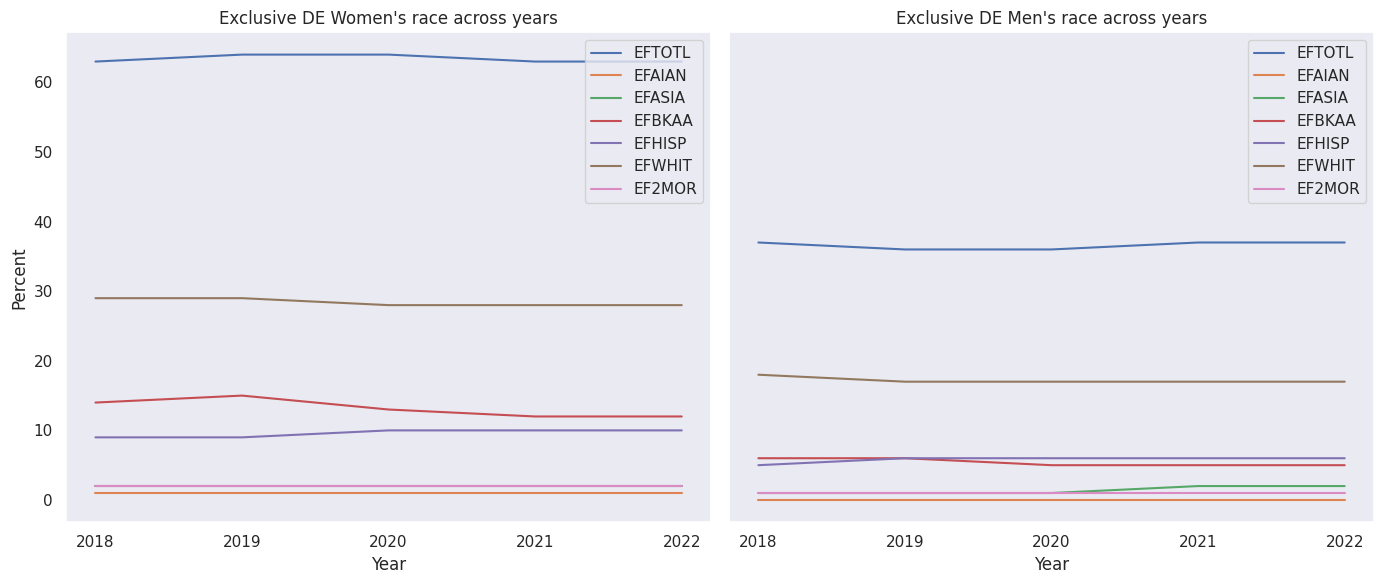

In [377]:



# Separate columns into women's and men's data
women_columns = [col for col in race_percent2.columns if col.endswith('W')]
men_columns = [col for col in race_percent2.columns if col.endswith('M')]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey = True)

# Plot women's race across years
for col in women_columns:
    axs[0].plot(race_percent2['YEAR'], race_percent2[col], label=col[:-1])  # Exclude last character ('W') from label
axs[0].set_title("Exclusive DE Women's race across years")
axs[0].set_xlabel('Year')
axs[0].set_xticks(race_percent2['YEAR'])
axs[0].set_ylabel('Percent')
axs[0].legend()
axs[0].grid(False)

# Plot men's race across years
for col in men_columns:
    axs[1].plot(race_percent2['YEAR'], race_percent2[col], label=col[:-1])  # Exclude last character ('M') from label
axs[1].set_title("Exclusive DE Men's race across years")
axs[1].set_xlabel('Year')
axs[1].set_xticks(race_percent2['YEAR'])
# axs[1].set_ylabel('Percent')
axs[1].legend()
axs[1].grid(False)

  # Set common y-axis label
ax[0].set_ylabel('Count')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [389]:
#LEVEL
# Specify columns to convert to percentages
levcols_to_convert = ['EFTOTLM', 'EFTOTLW']

# Apply the function to your DataFrame
level_convert = level_df.copy()
level_percent = convert_columns_to_percentages(level_convert, levcols_to_convert)

level_percent.reset_index(inplace=True)
level_percent

YEAR  EFALEVEL  EFTOTLT  EFTOTLM  EFTOTLW
0    2018         1   994787     36.0     64.0
1    2018         2   688427     38.0     62.0
2    2018         3   666765     38.0     62.0
3    2018         4    73393     37.0     63.0
4    2018         5   593372     38.0     62.0
..    ...       ...      ...      ...      ...
130  2022        45   335549     38.0     62.0
131  2022        51    31180     44.0     56.0
132  2022        52   163643     29.0     71.0
133  2022        59    59902     37.0     63.0
134  2022        60   275647     39.0     61.0

[135 rows x 5 columns]

In [476]:


def plot_levels_for_year(df, year, levels, level_descriptions):
    # Filter the DataFrame for the specified year and levels
    filtered_df = df[(df['YEAR'] == year) & (df['EFALEVEL'].isin(levels))]

     # Calculate the total students for all selected levels
    total_students_all_levels = filtered_df['EFTOTLT'].sum()

    level_list = []
    level_description_list = []
    total_students_list = []
    percentage_list = []

    # Plot bar charts for each level
    for i, level in enumerate(levels):
        level_data = filtered_df[filtered_df['EFALEVEL'] == level]
        plt.bar(i, level_data['EFTOTLT'], label=level_descriptions[level])

        total_students = level_data['EFTOTLT'].values[0]
        percentage = (total_students / total_students_all_levels) * 100
        level_list.append(level)
        level_description_list.append(level_descriptions[level])
        total_students_list.append(total_students)
        percentage_list.append(percentage)

  # Create a DataFrame from the collected data
    table_df = pd.DataFrame({
        'Level': level_list,
        'Level Description': level_description_list,
        'Total Students': total_students_list,
        'Percentage': percentage_list
    })

    # Display the DataFrame
    print(table_df)


    plt.xlabel('Levels')
    plt.ylabel('Total Students')

    plt.title(f'Total Exclusive DEStudents by Selected Level for Year {year}')
    plt.xticks(range(len(levels)), [level_descriptions[level] for level in levels], wrap = True, ha ='center')


    # Add y-axis formatter to include commas
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)), )

    # plt.legend()
    plt.show()



   Level         Level Description  Total Students  Percentage
0     22  Full-time, Undergraduate          406554   70.543835
1     32       Full-time, Graduate          169760   29.456165


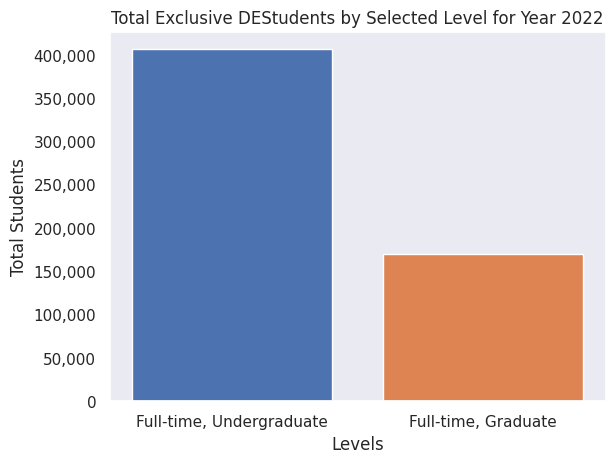

In [456]:
#Full Time UG and Grad 2022
level_descriptions = { 22: 'Full-time, Undergraduate', 32: 'Full-time, Graduate'}
plot_levels_for_year(level_percent, 2022, [ 22, 32], level_descriptions)

   Level        Level Description  Total Students  Percentage
0     42  Part-time,Undergraduate          394442   70.677764
1     52      Part-time, Graduate          163643   29.322236


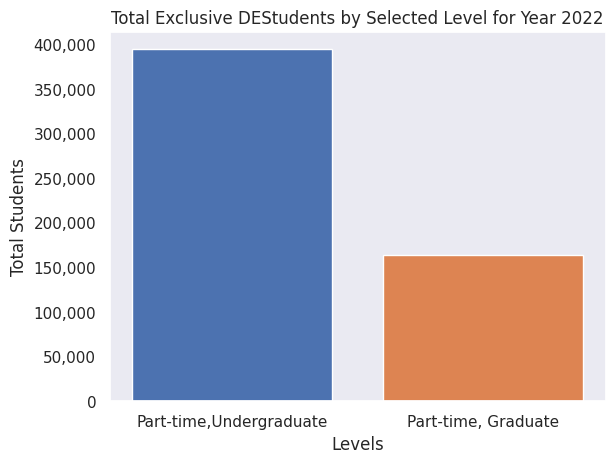

In [458]:
#Part Time  UG and Grad 2022
level_descriptions = { 42: 'Part-time,Undergraduate', 52: 'Part-time, Graduate'}
plot_levels_for_year(level_percent, 2022, [ 42, 52], level_descriptions)

   Level   Level Description  Total Students  Percentage
0      3      Degree-seek UG          764945   87.637724
1     11  Non-degree seek UG           36051    4.130268
2      4      First-time UG            71853    8.232008


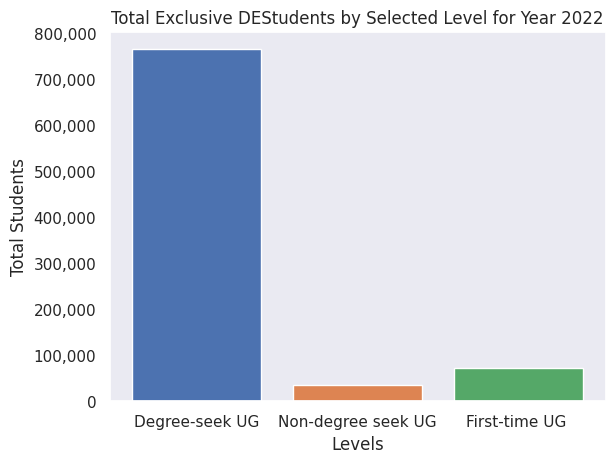

In [477]:
#Undergrad type
level_descriptions = { 3: 'Degree-seek UG', 11: 'Non-degree seek UG',4: 'First-time UG ', }
plot_levels_for_year(level_percent, 2022, [ 3, 11, 4], level_descriptions)

#What are the top DE fields of study?

In [489]:
cips = pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/depprogramsoffered18_22.csv')
#

In [519]:
cips.columns
cip_cols =[ 'INSTNM','YEAR', 'SECTOR', 'CIPCODE','PTOTAL', 'PTOTALDE', 'PTOTALDES']
cip_data = cips[cip_cols]

In [520]:
cip_data.head()

INSTNM  YEAR  SECTOR  CIPCODE  PTOTAL  PTOTALDE  \
0  Alabama A & M University  2019       1   1.0000       7         0   
1  Alabama A & M University  2019       1   1.0999       1         0   
2  Alabama A & M University  2019       1   1.1001       3         0   
3  Alabama A & M University  2019       1   1.9999       3         0   
4  Alabama A & M University  2019       1   3.0000       1         0   

   PTOTALDES  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [521]:
# sector_names = {
#         1: 'Public, 4-year',
#         2: 'Private not-for-profit, 4-year',
#         3: 'Private for-profit, 4-year',
#         4: 'Public, 2-year',
#         5: 'Private not-for-profit, 2-year',
#         6: 'Private for-profit, 2-year',
#         7: 'Public, less-than 2-year',
#         8: 'Private not-for-profit, less-than 2-year',
#         9: 'Private for-profit, less-than 2-year',
#         99: 'Sector unknown'
#     }

In [522]:
#get summary cipcodes - ending in .0000
def has_one_zero_after_decimal(f):
    return f % 1 == 0.0 and f % 10 != 0.0

# Filter the DataFrame based on the condition
cip_filt = cip_data[cip_data['CIPCODE'].apply(has_one_zero_after_decimal)]
cip_filt = cip_filt.drop('INSTNM', axis = 1)



In [538]:
cip_group= cip_filt.groupby(['YEAR','SECTOR','CIPCODE']).sum()
cip_group.reset_index(inplace = True)

#get just 2022 year
cip_group22=cip_group[cip_group['YEAR'] == 2022].copy()
cip_group22['% PTOTDE'] = cip_group22['PTOTALDE']/cip_group22['PTOTAL']*100
cip_group22['% PTOTDES'] = cip_group22['PTOTALDES']/cip_group22['PTOTAL']*100

cip_group22= cip_group22.sort_values(by='PTOTALDE', ascending=False)

cip_grand22=cip_group22[cip_group22['CIPCODE']== 99.0].copy()
cip_grand22

YEAR  SECTOR  CIPCODE  PTOTAL  PTOTALDE  PTOTALDES   % PTOTDE  % PTOTDES
804  2022       2     99.0   81539     10002     6558.0  12.266523   8.042777
769  2022       1     99.0   96618      9494     6969.0   9.826326   7.212942
874  2022       4     99.0   64571      6466     4195.0  10.013783   6.496725
839  2022       3     99.0    6243      3351      670.0  53.676117  10.732020
922  2022       6     99.0    3538       231       78.0   6.529112   2.204635
978  2022       9     99.0    4721        46       11.0   0.974370   0.233001
900  2022       5     99.0     480        40       14.0   8.333333   2.916667
947  2022       7     99.0    2354         8       13.0   0.339847   0.552251
959  2022       8     99.0     168         7        2.0   4.166667   1.190476

In [540]:
cip_22=cip_group22[cip_group22['CIPCODE'] !=99.0].copy()
cip_22

YEAR  SECTOR  CIPCODE  PTOTAL  PTOTALDE  PTOTALDES   % PTOTDE  % PTOTDES
802  2022       2     52.0    9982      2415     1505.0  24.193548  15.077139
872  2022       4     52.0    8481      2128      934.0  25.091381  11.012852
742  2022       1     13.0   11938      1890     1129.0  15.831798   9.457196
777  2022       2     13.0   11272      1748     1008.0  15.507452   8.942512
801  2022       2     51.0    9468      1716     1008.0  18.124208  10.646388
..    ...     ...      ...     ...       ...        ...        ...        ...
925  2022       7      9.0       7         0        0.0   0.000000   0.000000
924  2022       7      3.0       3         0        0.0   0.000000   0.000000
923  2022       7      1.0      27         0        0.0   0.000000   0.000000
919  2022       6     49.0      19         0        0.0   0.000000   0.000000
896  2022       5     49.0       7         0        0.0   0.000000   0.000000

[235 rows x 8 columns]

In [586]:
crosswalk=pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/IPEDS_CIPTITLES.csv')
# crosswalk
crosswalk_filt = crosswalk[crosswalk['codevalue'].apply(has_one_zero_after_decimal)]
crosswalk_filt

crosswalk_filt2 = crosswalk_filt.rename (columns ={'codevalue':'CIPCODE'})
crosswalk_filt2

cip_dict = dict(zip(crosswalk_filt2['CIPCODE'], crosswalk_filt2['valuelabel']))
# cip_dict

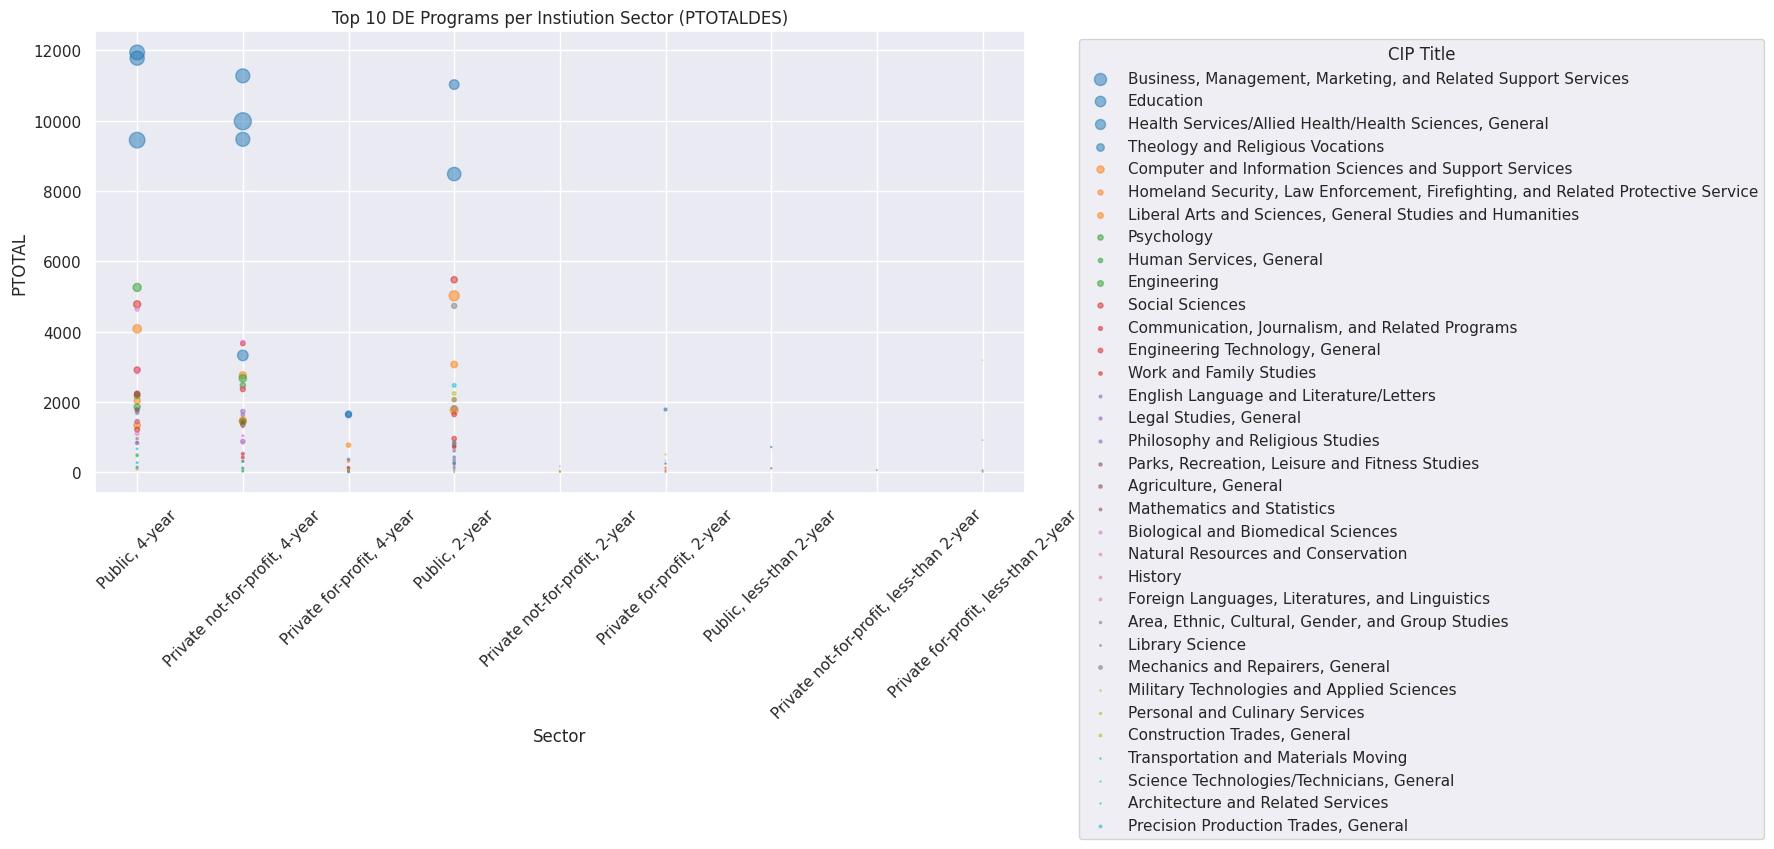

In [607]:
import matplotlib.pyplot as plt

# Get unique sectors from the data
unique_sectors = sorted(cip_22['SECTOR'].unique())

# Define sector names
sector_names = {
    1: 'Public, 4-year',
    2: 'Private not-for-profit, 4-year',
    3: 'Private for-profit, 4-year',
    4: 'Public, 2-year',
    5: 'Private not-for-profit, 2-year',
    6: 'Private for-profit, 2-year',
    7: 'Public, less-than 2-year',
    8: 'Private not-for-profit, less-than 2-year',
    9: 'Private for-profit, less-than 2-year',
    99: 'Sector unknown'
}

# Generate a list of unique colors
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_cipcodes)))

# Plot each CIP code with a unique color
plt.figure(figsize=(12, 6))
for i, cipcode in enumerate(unique_cipcodes):
    cip_data = cip_22[cip_22['CIPCODE'] == cipcode]
    sector_names_list = [sector_names[sector] for sector in cip_data['SECTOR']]
    plt.scatter(cip_data['SECTOR'], cip_data['PTOTAL'], s=cip_data['PTOTALDES']/10, alpha=0.5, label=cip_dict.get(cipcode, cipcode), color=colors[i])

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('PTOTAL')
plt.title('Top 10 DE Programs per Instiution Sector (PTOTALDES)')
plt.legend(title='CIP Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(unique_sectors, [sector_names[sector] for sector in unique_sectors], rotation=45)

plt.grid(True)
plt.show()



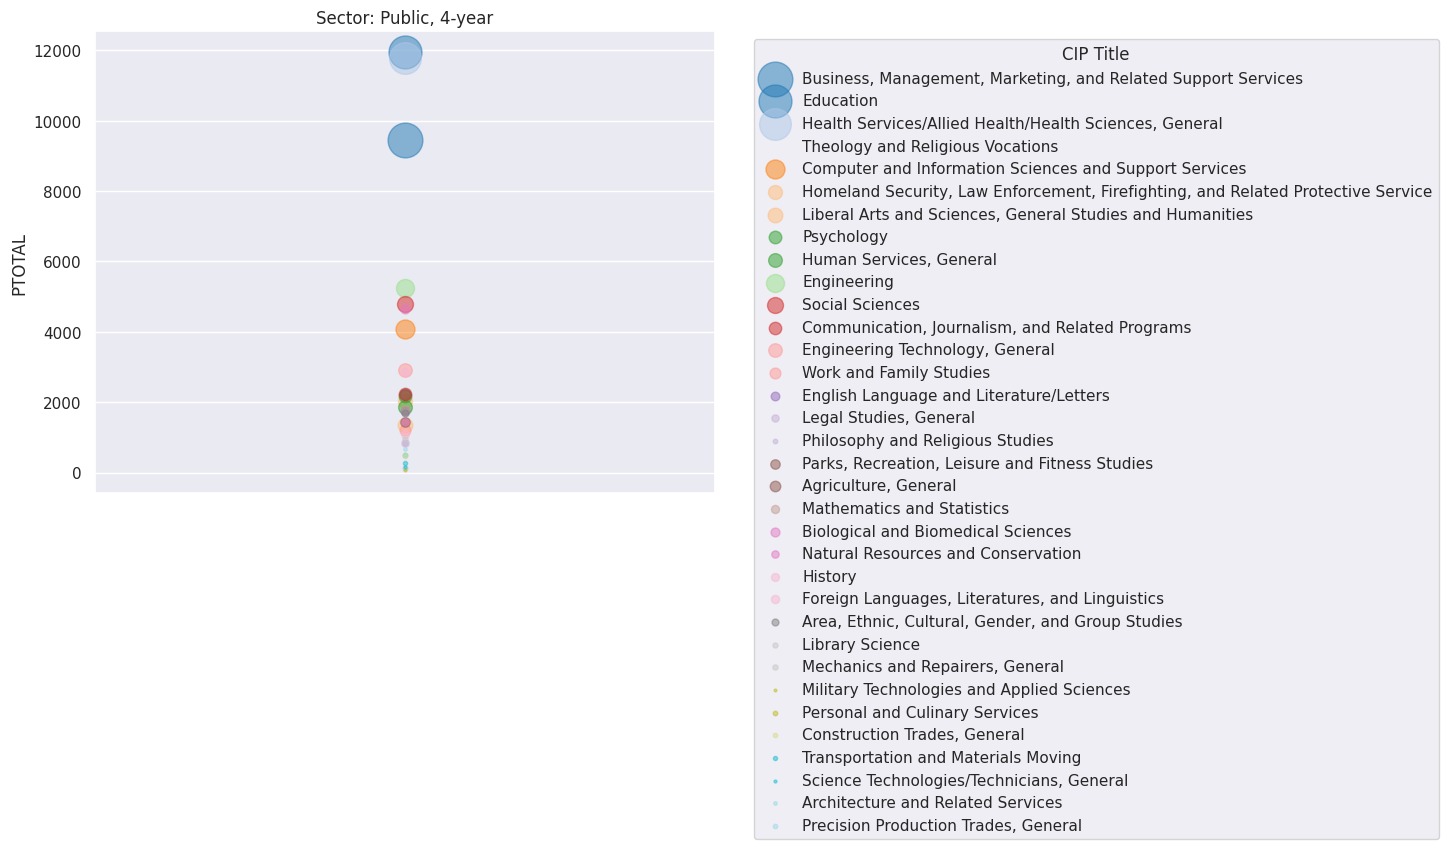

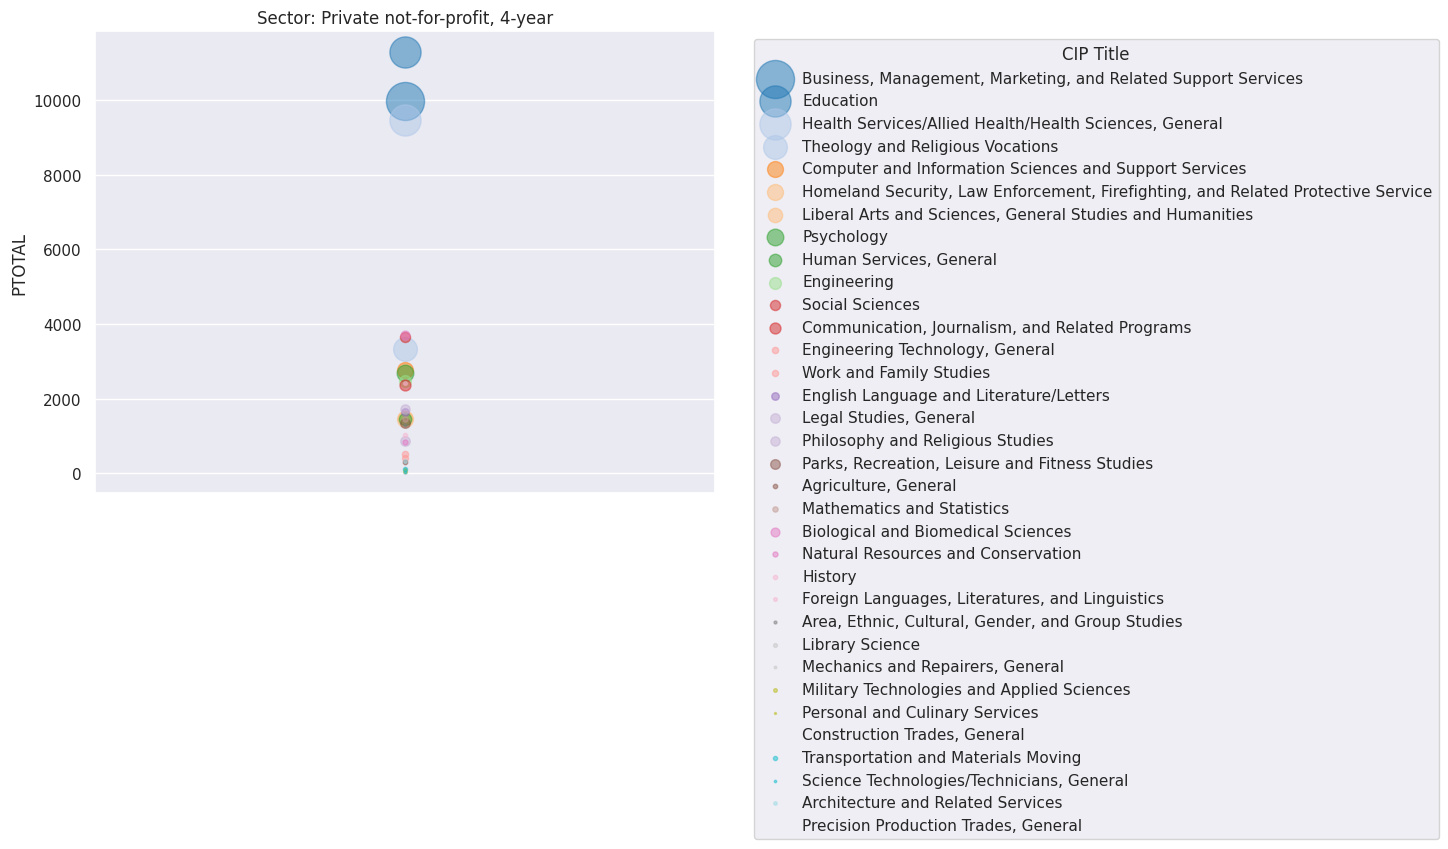

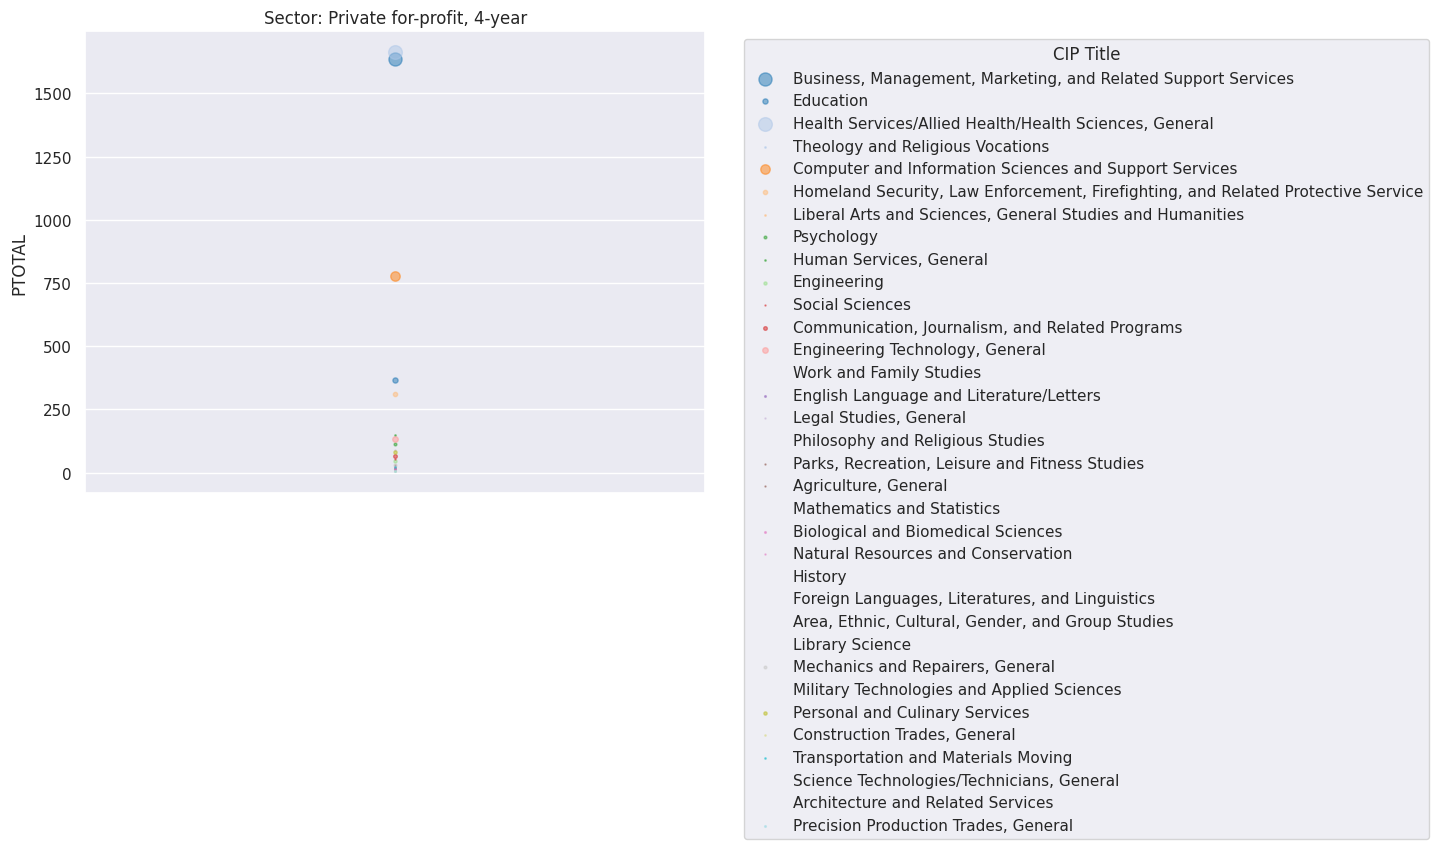

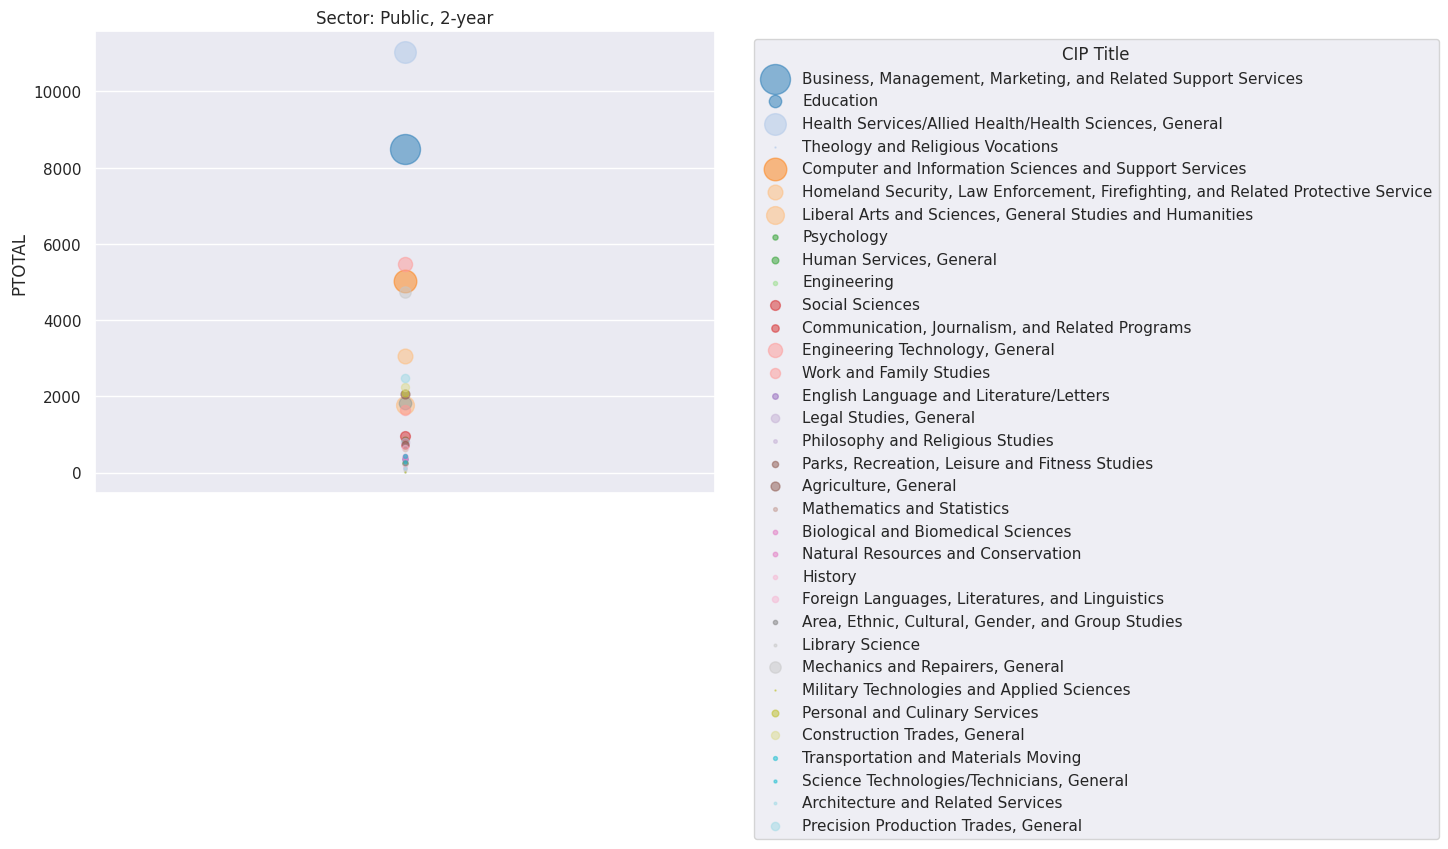

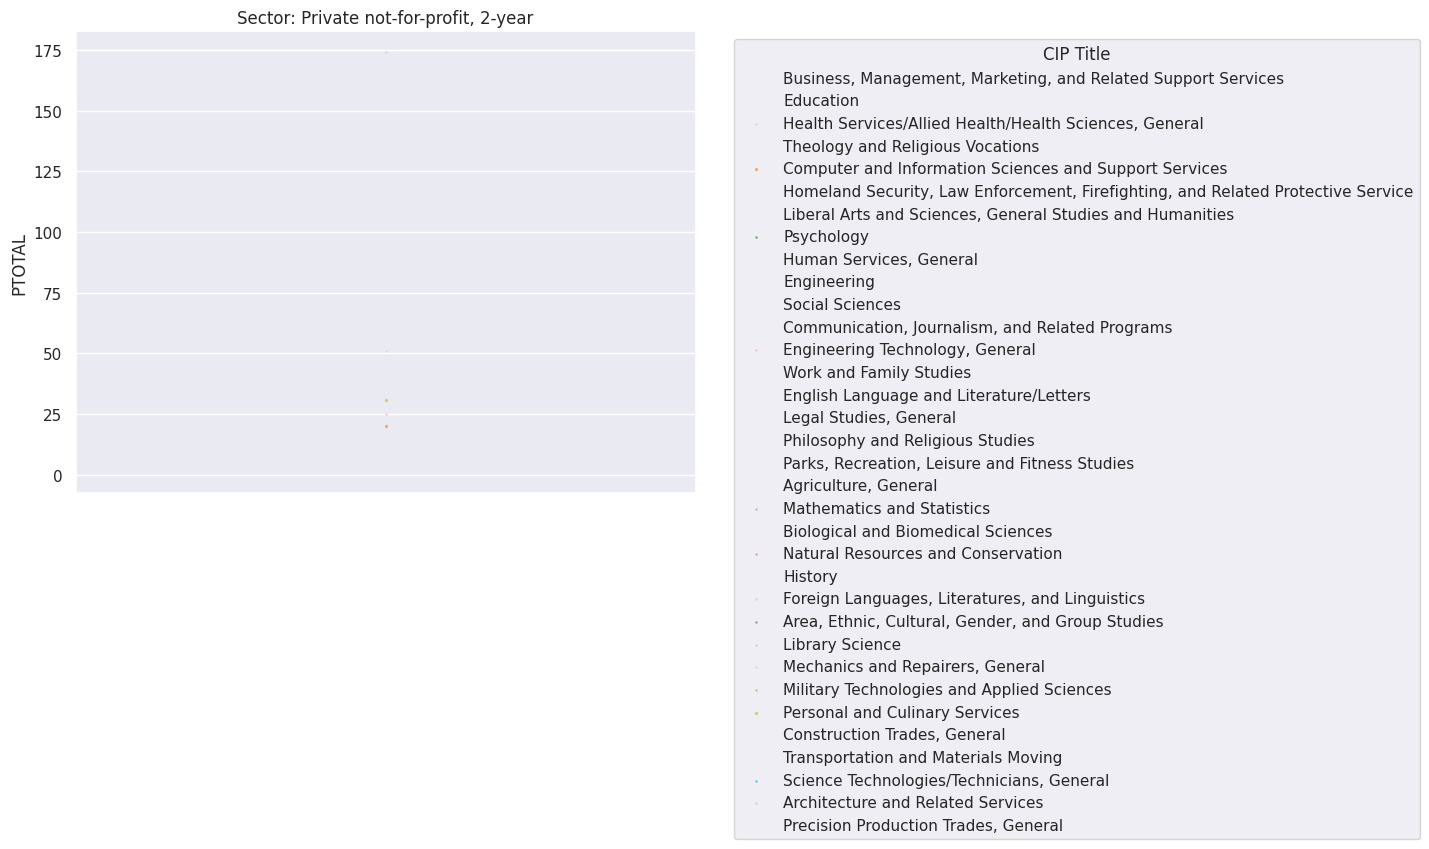

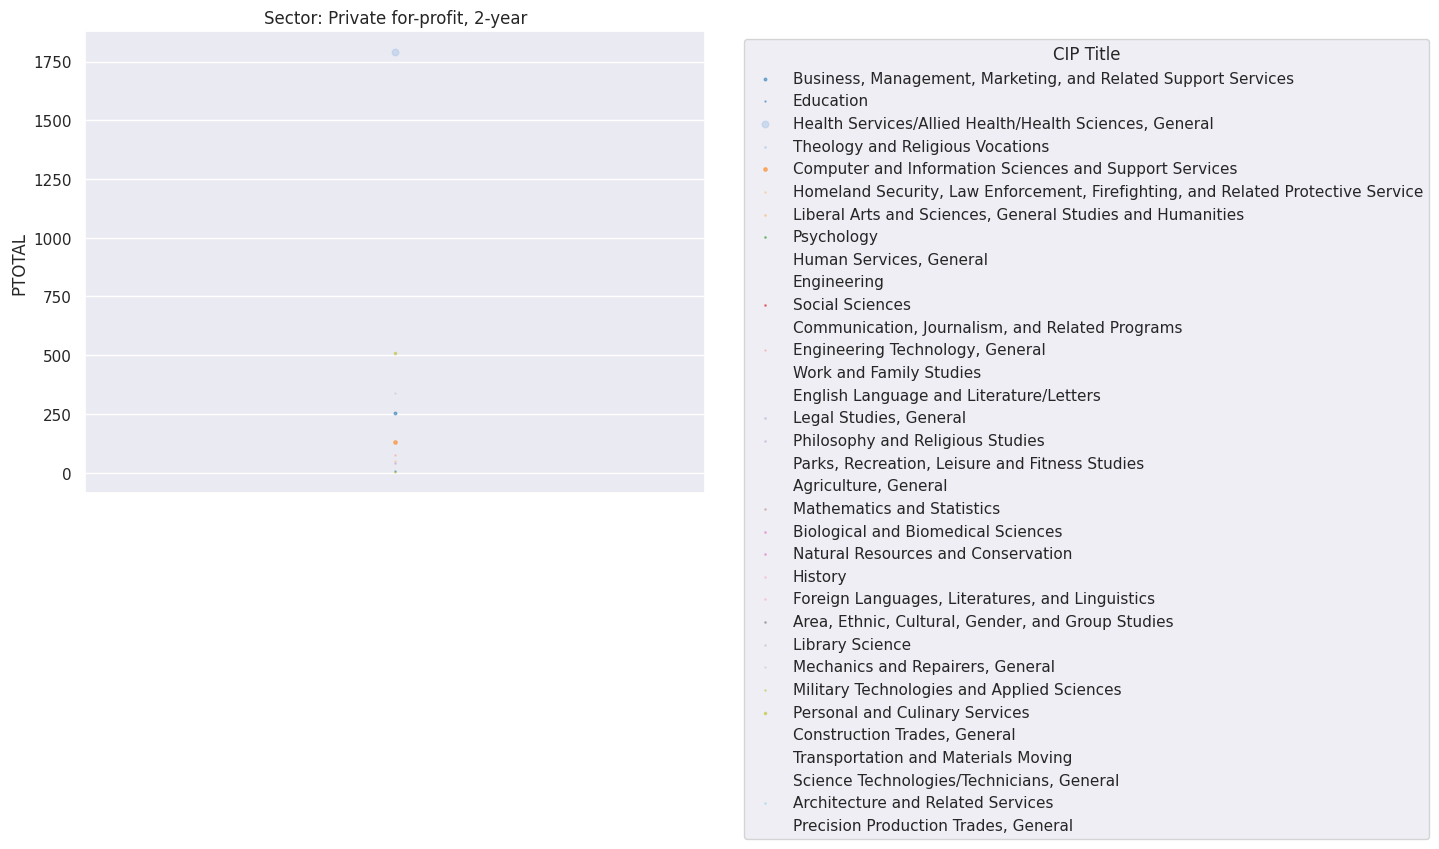

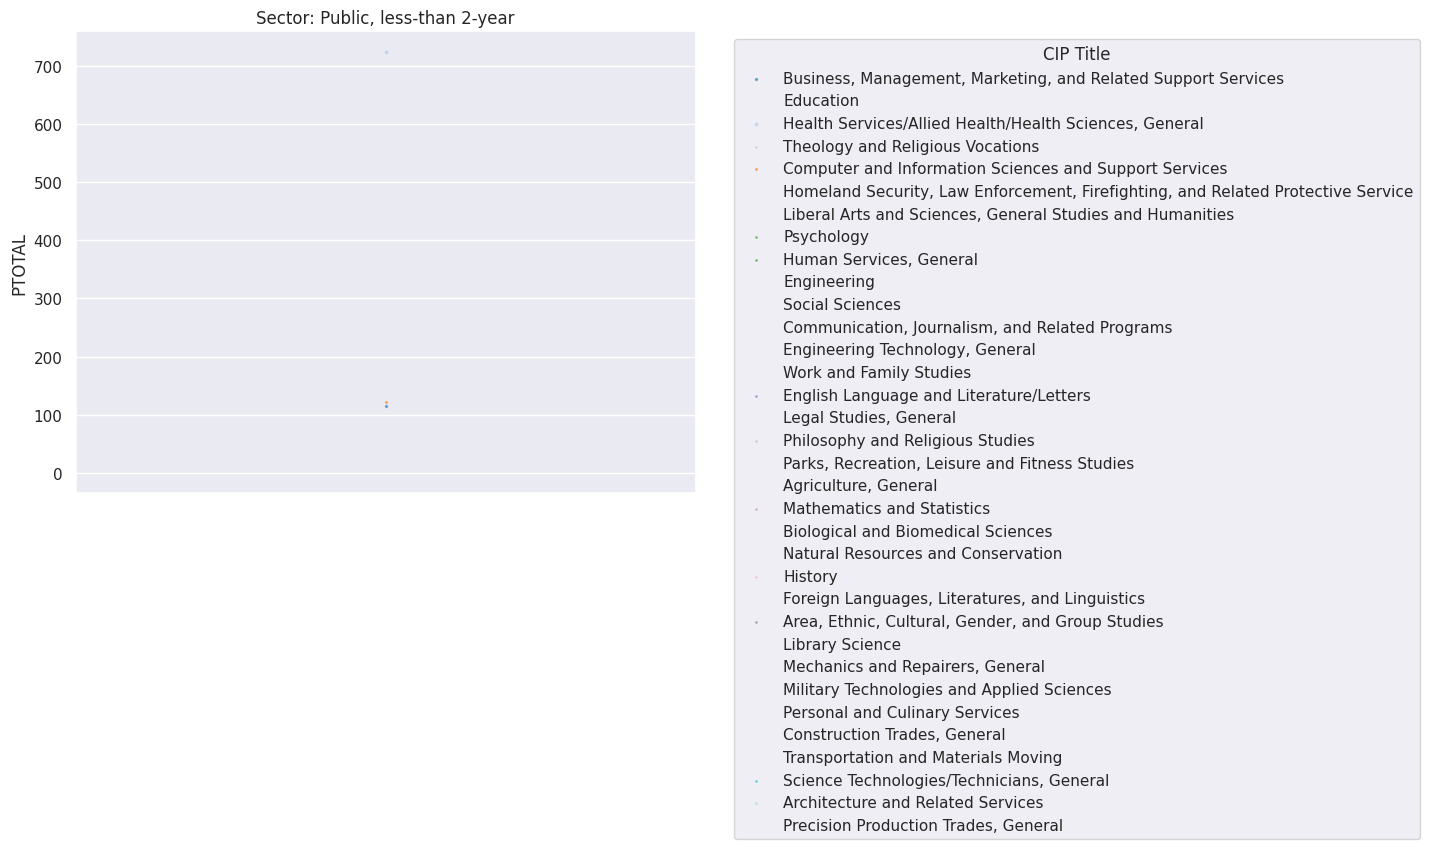

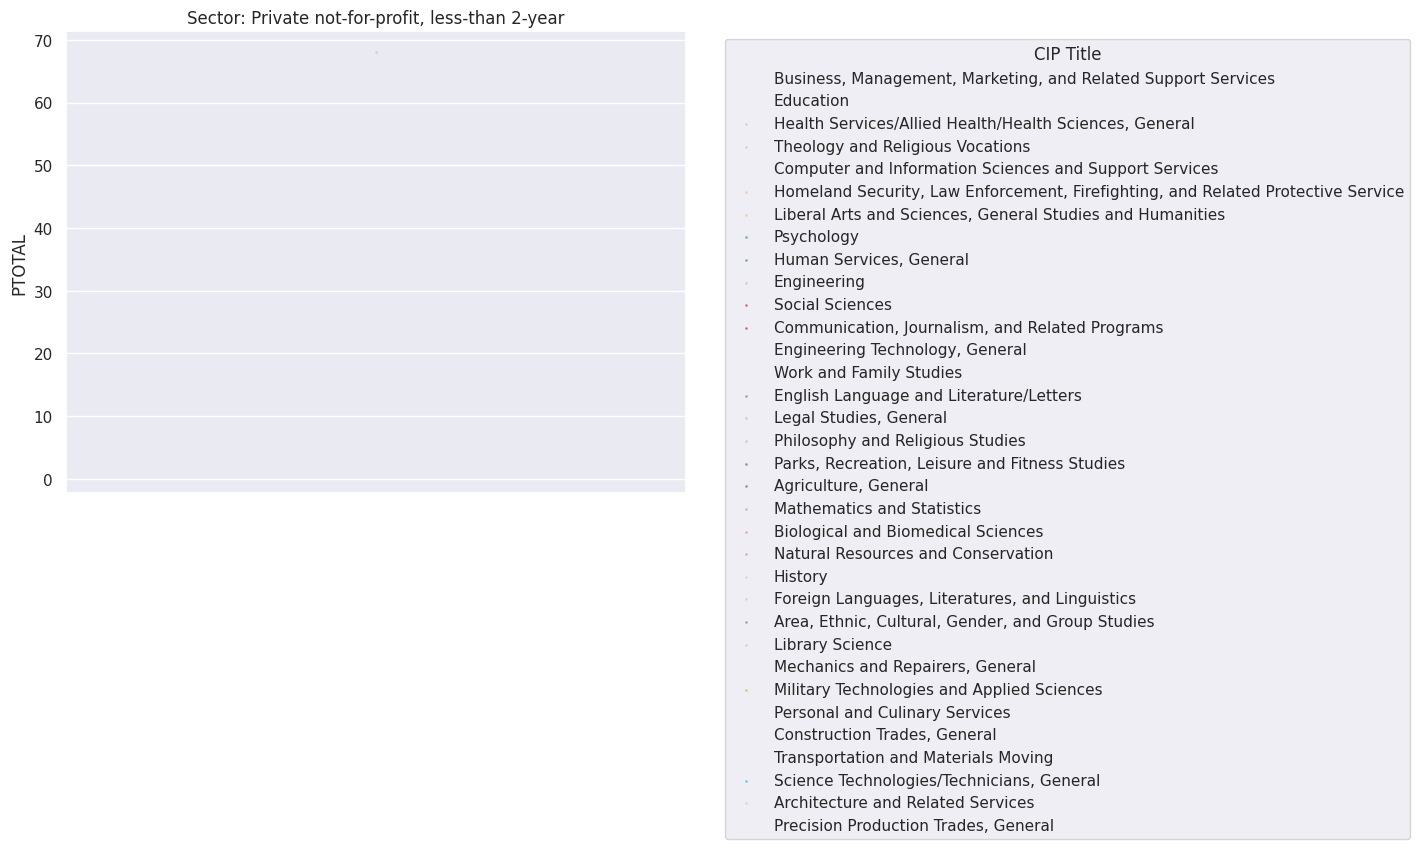

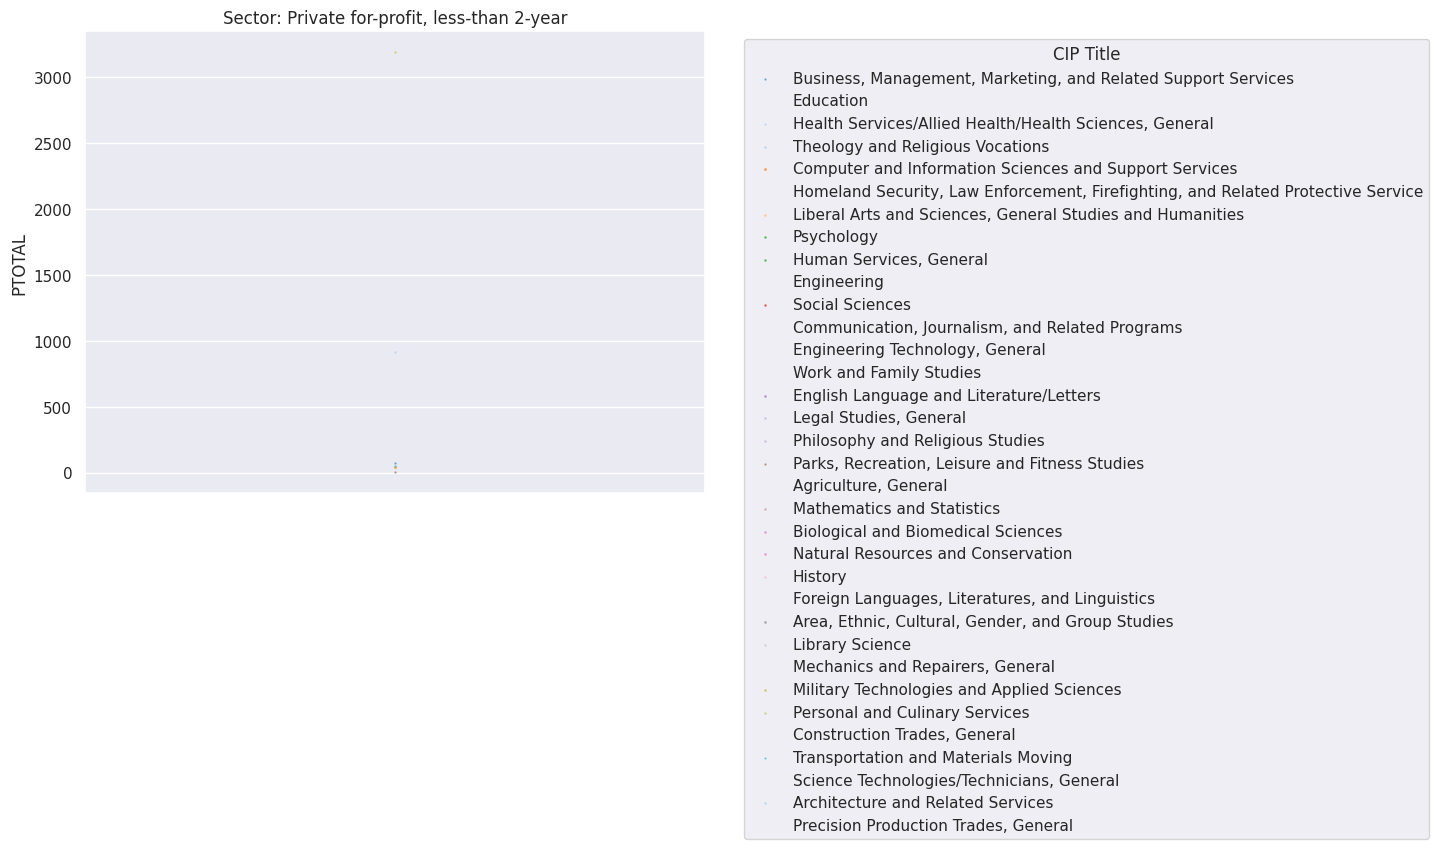

In [614]:

# Get unique sectors from the data
unique_sectors = sorted(cip_22['SECTOR'].unique())

# Sector names
sector_names = {
    1: 'Public, 4-year',
    2: 'Private not-for-profit, 4-year',
    3: 'Private for-profit, 4-year',
    4: 'Public, 2-year',
    5: 'Private not-for-profit, 2-year',
    6: 'Private for-profit, 2-year',
    7: 'Public, less-than 2-year',
    8: 'Private not-for-profit, less-than 2-year',
    9: 'Private for-profit, less-than 2-year',
    99: 'Sector unknown'
}

# Scaling factor for bubble size
scaling_factor = .50

# Generate a list of unique colors for each CIP code
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_cipcodes)))

# Plot each sector in a separate plot
for sector in unique_sectors:
    plt.figure(figsize=(8, 6))
    plt.title(f'Sector: {sector_names[sector]}')

    # Filter data for the current sector
    sector_data = cip_22[cip_22['SECTOR'] == sector]

    for i, cipcode in enumerate(unique_cipcodes):
        cip_data = sector_data[sector_data['CIPCODE'] == cipcode]
        plt.scatter(cip_data['SECTOR'], cip_data['PTOTAL'], s=cip_data['PTOTALDES']*scaling_factor, alpha=0.5, label=cip_dict.get(cipcode, cipcode), color=colors[i])

    # Remove x-axis
    plt.gca().axes.get_xaxis().set_visible(False)

    # Add labels and legend
    plt.ylabel('PTOTAL')
    plt.legend(title='CIP Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

